# Problem Statement
To predict the salary of employee based on the information provided in the dataset.
How will the company profit from this solution?1. Companies can't keep track of their finance while paying salaries to employees.
2. Companies can understand what factors affects their finance. for example: location ,
employee experience, education qualification, etc.
3. Companies can get data about their competition companies finance and improve their own onbasis of that data.
4. They can get an optimized range of salaries that should be given to their employees basedon factors such as job type, employee experience, Education qualification, etc. that will
reduce spending of extra money.


# How will the employee profit from this solution?
1. Employees find it difficult to know what factors affect their salaries.
2. Employees can find companies matching their salary requirement based on job title,
experience, etc.
3. They can understand what factor is affecting their salaries so they can improve working onthat factor.
4. They can get data about salaries paid by other companies for same job title, experience,education qualification, etc so they can to get a raise in their salaries.

In [1]:
#import the standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Load the data using the pandas
train_dataset=pd.read_csv('/home/vinod/Downloads/archive/train_dataset.csv')
train_salaries=pd.read_csv('/home/vinod/Downloads/archive/train_salaries.csv')
test_dataset=pd.read_csv('/home/vinod/Downloads/archive/test_dataset.csv')

In [3]:
# Adding salary data to train_dataset
train=train_dataset.merge(train_salaries)
train.head().style.background_gradient(cmap='tab20b_r')

# Basic EDA

# Identifying the number of features or columns

# Know all the names of the columns¶

In [4]:
# get all column names
train_dataset.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [5]:
# Check which columns are having categorical, numerical or boolean values of train_dataset
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [6]:
# Check which columns are having categorical, numerical or boolean values of test_dataset
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [7]:
# For train_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns  
train.describe().style.background_gradient(cmap='summer_r')

In [8]:
# for test_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns
test_dataset.describe().style.background_gradient(cmap='gist_stern')

In [9]:
# len of train and test dataset
print("The length of train data is",len(train))
print("The length of test data is",len(test_dataset))

The length of train data is 1000000
The length of test data is 1000000


# Get unique values

In [10]:
# get how many unique values are in train_dataset
train.nunique()

jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
salary                     280
dtype: int64

In [11]:
# get how many unique values are in test_dataset
test_dataset.nunique()

jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
dtype: int64

# Counting the total number of missing values¶

In [12]:
# Check for missing values in all the columnns of the train_dataset
train.isna().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [13]:
 # Check for missing values in all the columnns of the test_dataset
test_dataset.isna().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

# By the observation gather from the train_data.info(), we can know there are no missing values in the train and test dataset

# removing 'jobId' and 'companyId' data from train and test data

In [14]:
# drop jobId and companyId from train_dataset
train=train.drop(['jobId','companyId'],axis=1)
train.head().style.background_gradient(cmap='jet')

In [15]:
# drop jobId and companyId from test_dataset
test_dataset=test_dataset.drop(['jobId','companyId'],axis=1)
test_dataset.head().style.background_gradient(cmap='terrain')

# Check for categorical columns in the dataset

By observing the train_data.info() cell, we can biforcate the datatype for which the object is the values which indicates those are the categorical columns. This dataset has more categorical columns than numerical values

1. jobType
2. degree
3. major
4. industry

In [16]:
# creating two empty list to store categorical column names and numerical column names respectively

# looping on whole dataset for geting list of categorical and numerical data column name and storing in respective list variable
categorical_col = [i for i in train.columns if train[i].dtype == 'object']
numerical_col = [i for i in train.columns if train[i].dtype != 'object']


# Correlation Matrix

# Why?
A correlation matrix is a table showing correlation coefficients between variables.

### There are three broad reasons for computing a correlation matrix:

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

In [17]:
# Correlation metrix using pandas
train.corr().style.background_gradient(cmap='winter')

## From above correlation matrix:
1. yearsExperience and salary are positively correlated.

2. yearsExperience and milesFromMetropolis have no correlation.

3. milesFromMetropolis and salary are weakly negatively correlated.

<AxesSubplot:>

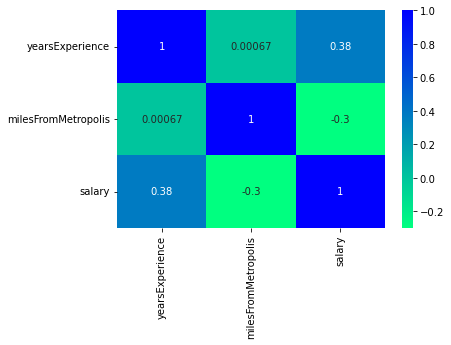

In [18]:
# Correlation metrix using seaborn
sns.heatmap(train.corr(),annot=True,cmap='winter_r')

# Chi-square Test



1. The Chi Square statistic is commonly used for testing relationships between categorical variables.

2. The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

3. Example: Is there any significant relationship between gender and education qualification?

4. The Chi-Square statistic is most commonly used to evaluate Tests of Independence when using a crosstabulation.

5. Crosstabulation presents the distributions of two categorical variables simultaneously, with the intersections of the categories of the variables appearing in the cells of the table. that is values of one variable represents the row and other's value represents the column.

6. Formula: x^2 = Summation of( (observed value - Expected value)^2/Expected value )

7. The Chi-Square statistic is based on the difference between what is actually observed in the data and what would be expected if there was truly no relationship between the variables.

8. This statistic can be evaluated by comparing the actual value against a critical value found in a Chi-Square distribution (where degrees of freedom is calculated as of rows – 1 x columns – 1), but it is easier to simply examine the p-value.

9. To make a conclusion about the hypothesis with 95% confidence. Significance(p value of the Chi-square statistic) should be less than 0.05.

    1. Alpha level = 0.05(i.e 5%) 95% confidence about conclusion and 5% risk of not making a correct conclusion.

    2. Interpret the key results for Chi-Square Test for Association

        Determine whether the association between the variables is statistically significant.

        Examine the differences between expected counts and observed counts to determine which variable levels may have the most impact on association.


In [19]:
# import necessary libraries for chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# creating function for performing chi-sqaure test on two columns
def chi_squre(x,y):
    
    #Contingency Table
    contingency_table=pd.crosstab(train[x],train[y])
    b=chi2_contingency(contingency_table)
    
    #Observed Values
    observed_values=contingency_table.values
    
    #Expected Values
    expected_values=b[3]
    chi_squre=sum([(0-e)**2./e for o,e in zip(y,expected_values)])
    no_of_rows=len(contingency_table.iloc[0:,0])
    no_of_columns=len(contingency_table.iloc[0,0:])
    
    #Degree of Freedom
    degree_of_freedom=(no_of_rows-1)*(no_of_columns-1)
    
    #Significance Level 5%
    signigicance_leve=0.05
    
    #chi-square statistic
    chi_squre_statistic=chi_squre[0]+chi_squre[1]
    print('the chi_squre_statistics',chi_squre_statistic)
    print('degree of fredom',degree_of_freedom)
    
    #critical_value
    critical_value=chi2.ppf(q=1-0.05,df=degree_of_freedom)
    
    #p-value
    p_value=chi2.cdf(x=chi_squre_statistic,df=degree_of_freedom)
    print('critical_value',critical_value)
    print('p_value',p_value)


    # conditional statements for checking chi-sqaure test condition for hypothesis selection based on chi_square_statistic and critical_value     
    if chi_squre_statistic>=critical_value:
        print("Reject H0,There is no relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
    
    # conditional statements for checking chi-sqaure test condition for hypothesis selection based on p_value and alpha
    if p_value>=0.05:
        print("Reject H0,There is no relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
    

In [20]:
# looping on categorical data list and use function for performing chi-square test on columns from dataset
for i in categorical_col:
    for j in categorical_col:
        if i==j:
            pass
        else:
            print('Chi_squre_test on: %s %s'%(i,j))
            print()
            chi_squre(i,j)
            print('-----'*15,'\n')

Chi_squre_test on: jobType degree

the chi_squre_statistics 262750.93706100003
degree of fredom 28
critical_value 41.33713815142739
p_value 1.0
Reject H0,There is no relationship between 2 categorical variables
Reject H0,There is no relationship between 2 categorical variables
--------------------------------------------------------------------------- 

Chi_squre_test on: jobType major

the chi_squre_statistics 72915.438926
degree of fredom 56
critical_value 74.46832415930936
p_value 1.0
Reject H0,There is no relationship between 2 categorical variables
Reject H0,There is no relationship between 2 categorical variables
--------------------------------------------------------------------------- 

Chi_squre_test on: jobType industry

the chi_squre_statistics 285762.0
degree of fredom 42
critical_value 58.12403768086803
p_value 1.0
Reject H0,There is no relationship between 2 categorical variables
Reject H0,There is no relationship between 2 categorical variables
-------------------------

# From above chi-square test:

- correlated variables:

  1. jobtype and degree
  2. jobtype and major
  3. degree and major


# Scatter Plot



1. A scatter plot is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data.

2. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

3. Scatter plot's are used to observe and show relationships between two numeric variables.



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


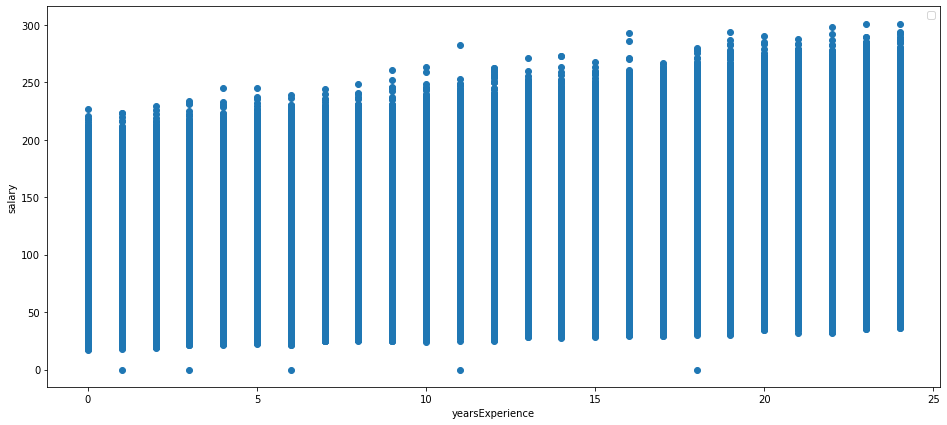

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


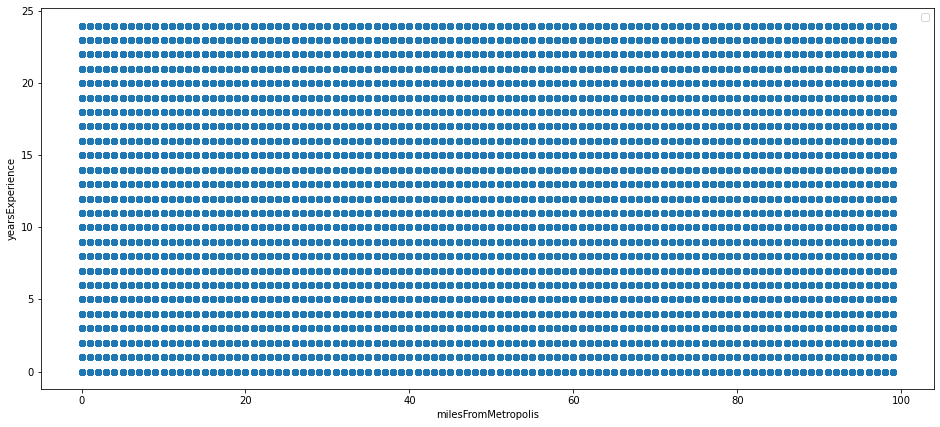

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


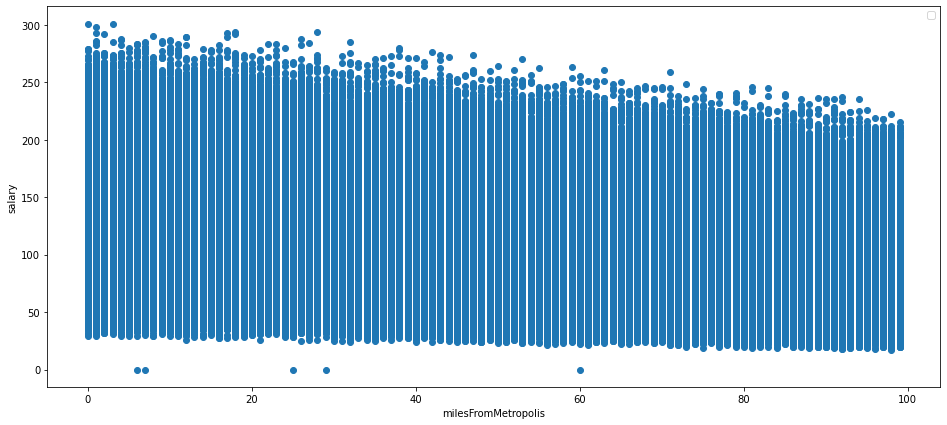

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


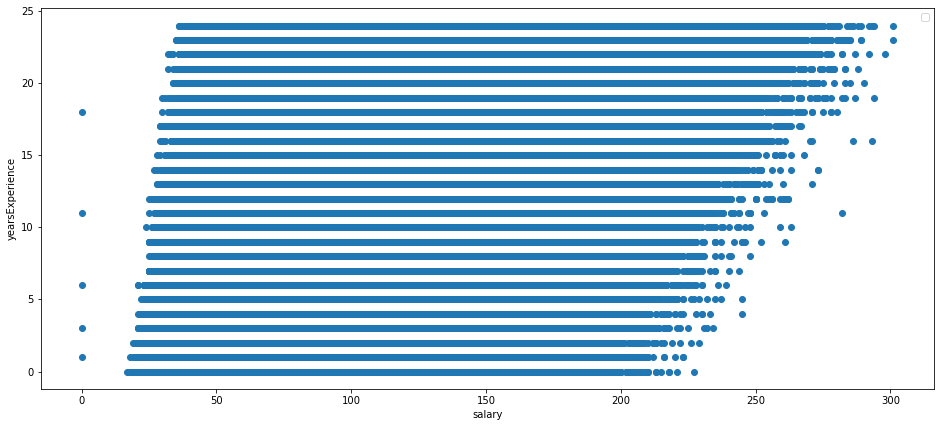

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [21]:
# Scatter plot using matplotlib 
# create function for ploting scatterplot between two columns of dataset
def scatter_plot(i,j):
    plt.figure(figsize=(16,7))
    plt.scatter(x=train[i],y=train[j])
    plt.xlabel(i)
    plt.ylabel(j)
    plt.legend()
    plt.show()

# Loop through numerical data list and use function to scatter plot between two columns
for i in numerical_col:
    for j in numerical_col:
        if i==j:
            pass
        else:
            scatter_plot(i,j)

From above scatter plot

1. Increase in value on yearsExperience axis results in increase of values on salary axis. That is they are positively correlated.

2. Increase in value on 
milesFromMetropolis axis results in decrease of values on salary axis. That is they are negatively correlated.

2. There is no change in values of yearExperience vs milesFromMetropolis graph. That is there is no correlation between these variables.

# Histogram



1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".


In [22]:
train.hist(figsize=(16,5))

array([[<AxesSubplot:title={'center':'yearsExperience'}>,
        <AxesSubplot:title={'center':'milesFromMetropolis'}>],
       [<AxesSubplot:title={'center':'salary'}>, <AxesSubplot:>]],
      dtype=object)

From the above histogram

1. yearsExperience data distribution is symmetric.

2. milesFromMetropolis data distribution is symmetric.

3. salary data distribution is symmetric, unimodel (it has only one peak in distribution)


# groupby

<AxesSubplot:xlabel='jobType'>

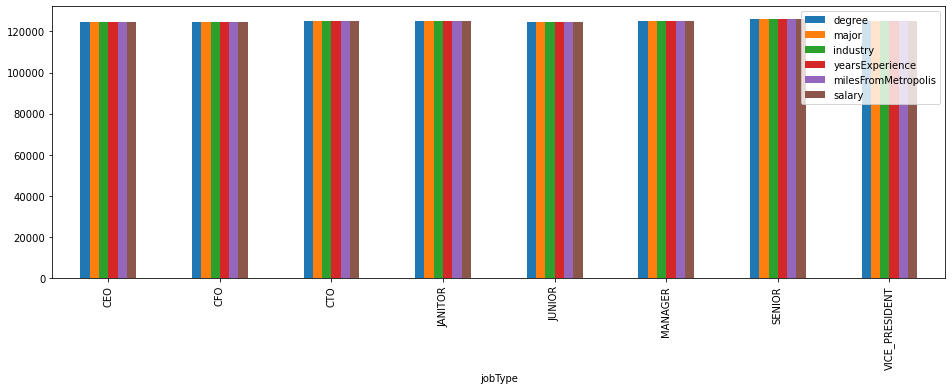

In [23]:
# goup data by jobType and plot count plot
train.groupby('jobType').count().plot(kind='bar',figsize=(16,5))

from above graph:
1. All data for each jobType is distributed equally.

<AxesSubplot:xlabel='degree'>

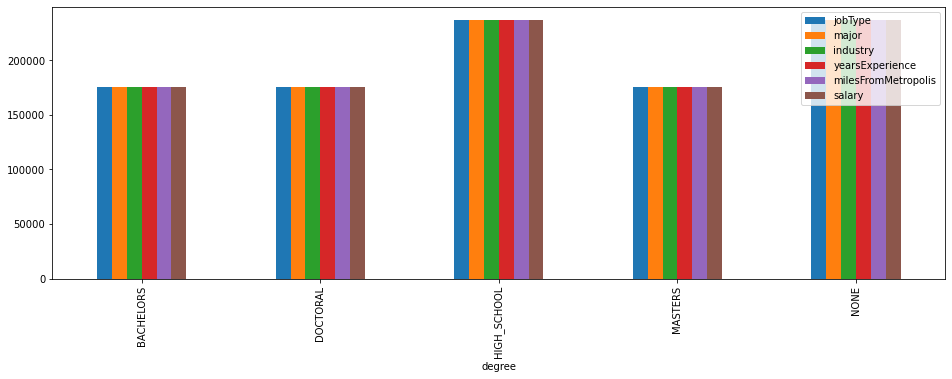

In [24]:
# goup data by degree and plot count plot
train.groupby('degree').count().plot(kind='bar',figsize=(16,5))

# From above graph:

1. All data for BACHELORS, DOCTORAL, MASTERS are equally distributed.

2. All data for HIGH_SCHOOL, NONE are equally distributed.

3. Here the data distribution between group of BACHELORS, DOCTORAL, MASTERS is less than data distribution for group HIGH_SCHOOL, NONE

<AxesSubplot:xlabel='major'>

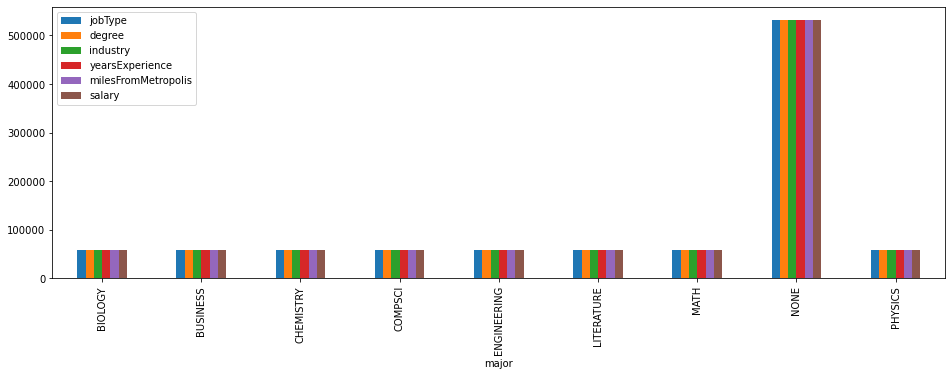

In [25]:
# goup data by major and plot count plot
train.groupby('major').count().plot(kind='bar',figsize=(16,5))

# From above graph:

1. Except "NONE" all data for each major are equally distributed.

2. There is large distribution of data for major NONE as compared to other major's


<AxesSubplot:xlabel='industry'>

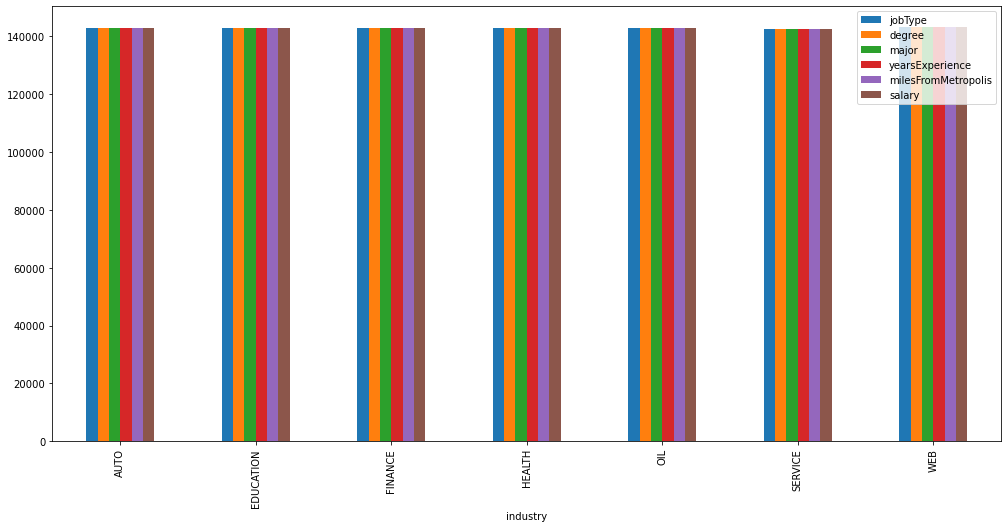

In [26]:
# goup data by industry and plot count plot
train.groupby('industry').count().plot(kind='bar',figsize=(17,8))

from above graph:
1. All data for each industry is distributed equally.

<AxesSubplot:xlabel='yearsExperience'>

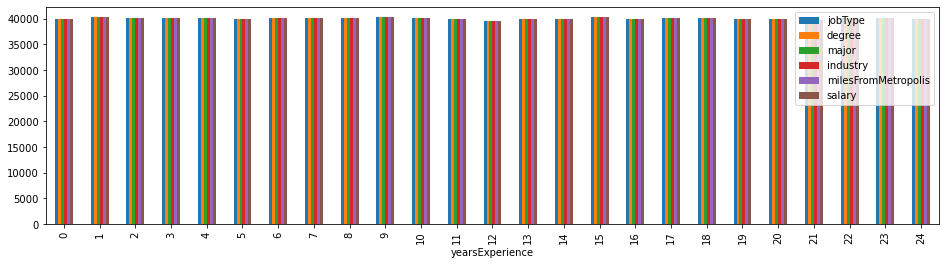

In [27]:
# goup data by yearsExperience and plot count plot
train.groupby('yearsExperience').count().plot(kind='bar',figsize=(16,4))

from above graph:
1. All data for each yearsExperience is distributed almost equally.

<AxesSubplot:xlabel='milesFromMetropolis'>

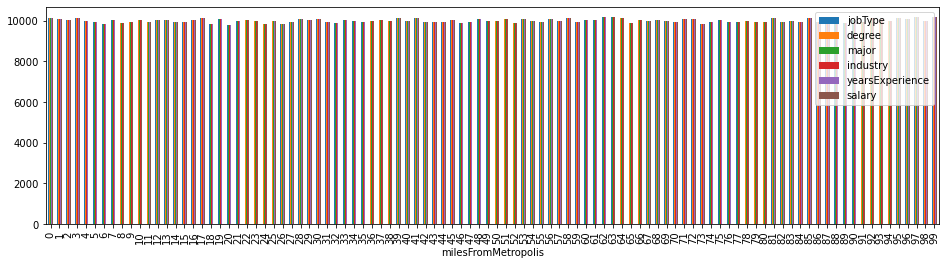

In [28]:
# goup data by milesFromMetropolis and plot count plot
train.groupby('milesFromMetropolis').count().plot(kind='bar',figsize=(16,4))

from above graph:
1. All data for each milesFromMetropolis is distributed almost equally.

<AxesSubplot:xlabel='salary'>

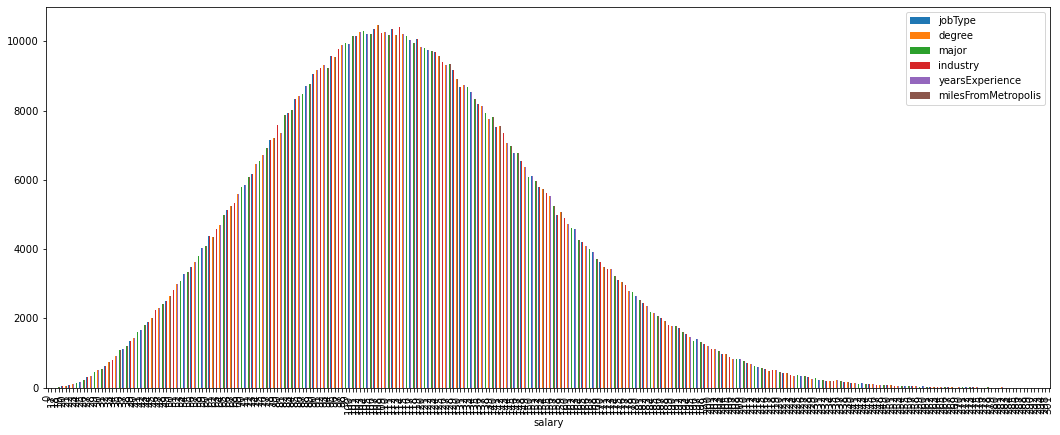

In [29]:
# goup data by salary and plot count plot
train.groupby('salary').count().plot(kind='bar',figsize=(18,7))

from above graph:
1. All data for each value of salary is distributed symmetrical and unimodel.

#  Box Plot

# A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset


<AxesSubplot:>

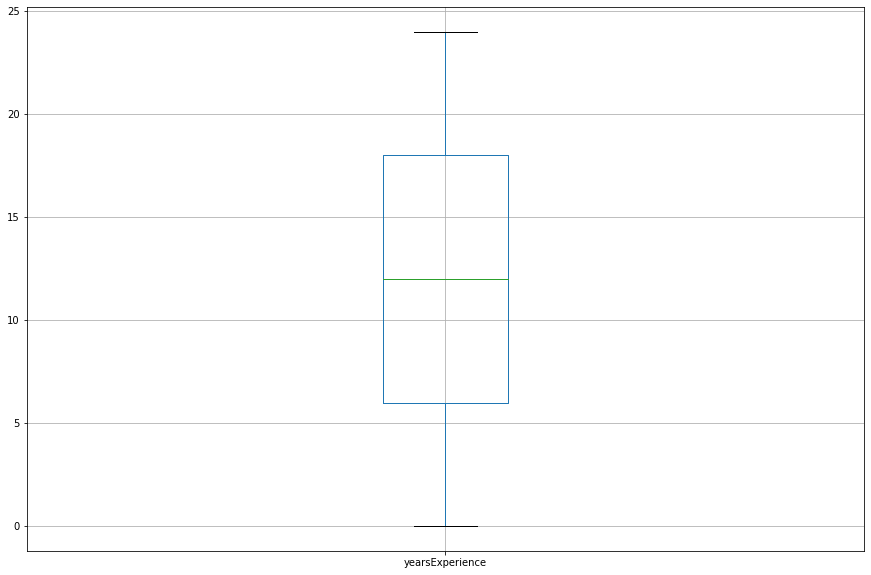

In [30]:
# box plot using pandas 
# box plot for yearsExperience column
train.boxplot(column='yearsExperience',figsize=(15,10))

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has yearExperience of between range 0 to 6.
  2. 25% of employee has yearExperience between range 6 to 12.
  3. 25% of employee has yearExperience between range 12 to 18.
  4. 25% of employee has yearExperience between range 18 to 24

<AxesSubplot:>

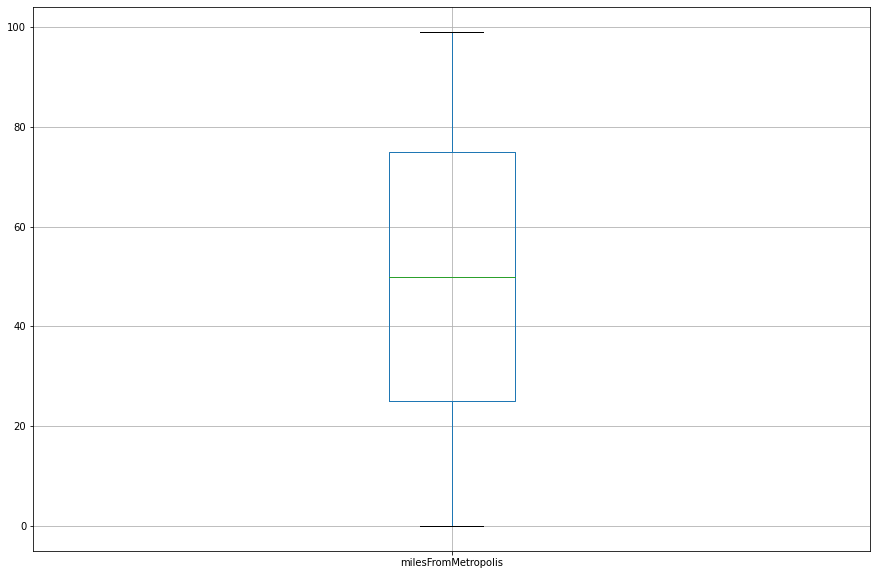

In [31]:
# box plot using pandas 
# box plot for milesFromMetropolies column
train.boxplot(column='milesFromMetropolis',figsize=(15,10))

# from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of milesFromMetropolis between range 0 to 24.
  2. 25% of employee has value of milesFromMetropolis between range 24 to 52.
  3. 25% of employee has value of milesFromMetropolis between range 52 to 76.
  4. 25% of employee has value of milesFromMetropolis between range 76 to 100

In [32]:
# box plot using pandas 
# box plot for salary column
train.boxplot(column='salary',figsize=(16,10))

<AxesSubplot:>

# from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of salary between range 0 to 88.
  2. 25% of employee has value of salary between range 88 to 120.
  3. 25% of employee has value of salary between range 120 to 150.
  4. 25% of employee has value of salary between range 150 to 300


- The mean salary is around 120

<AxesSubplot:xlabel='yearsExperience'>

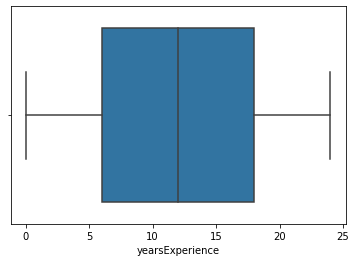

In [33]:
# box plot using seaborn 
# box plot for yearsExperience column
sns.boxplot(train['yearsExperience'])


<AxesSubplot:xlabel='milesFromMetropolis'>

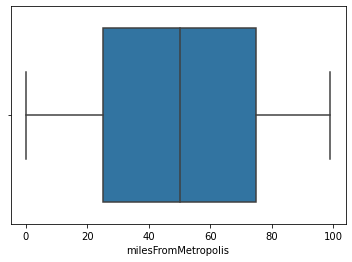

In [34]:
# box plot for mileFromMetropolis column
sns.boxplot(train['milesFromMetropolis'])

<AxesSubplot:xlabel='salary'>

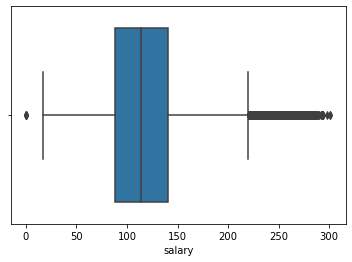

In [35]:
# box plot for salary column
sns.boxplot(train['salary'])

# Violin Plot



1. A violin plot is a method of plotting numeric data.

1. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

3. It has:

    1. Median (a white dot on the violin plot)
    2. Interquartile range (the black bar in the center of violin)
    3. The lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively.

In [36]:
# violin plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize=(20,6))
sns.violinplot(x='yearsExperience', y='milesFromMetropolis', data=train, palette='rainbow')

<AxesSubplot:xlabel='yearsExperience', ylabel='milesFromMetropolis'>

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

In [37]:
# violin plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.violinplot(x='yearsExperience', y='salary', data=train, palette='rainbow')

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

# from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

In [38]:
# violin plot for milesFromMetropolis from salary columns
plt.figure(figsize=(20,6))
sns.violinplot(x='milesFromMetropolis', y='salary', data=train, palette='rainbow')

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

#  Boxenplot

1. The boxen plot, otherwise known as a Letter-value plot, is a box plot meant for large data sets (n > 10,000).

2. The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values.

3. By plotting different quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end.


<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

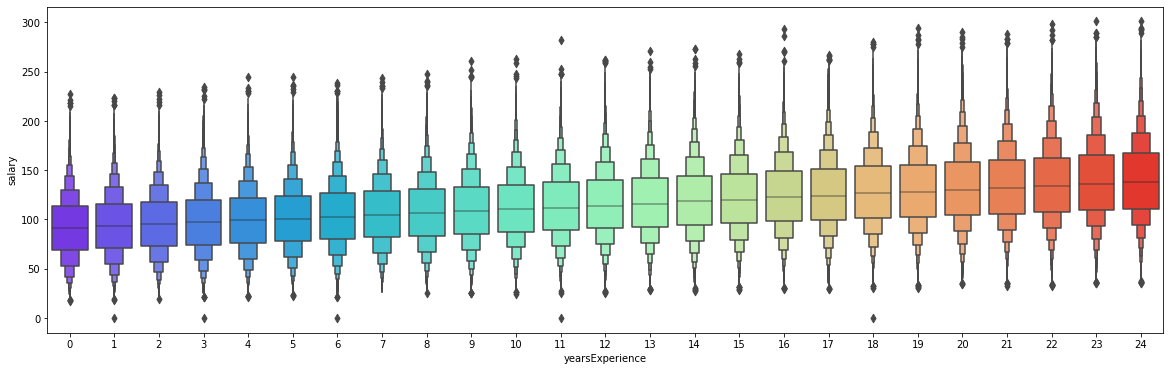

In [39]:
# boxen plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.boxenplot(x='yearsExperience', y='salary', data=train, palette='rainbow')

# from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

<AxesSubplot:xlabel='yearsExperience', ylabel='milesFromMetropolis'>

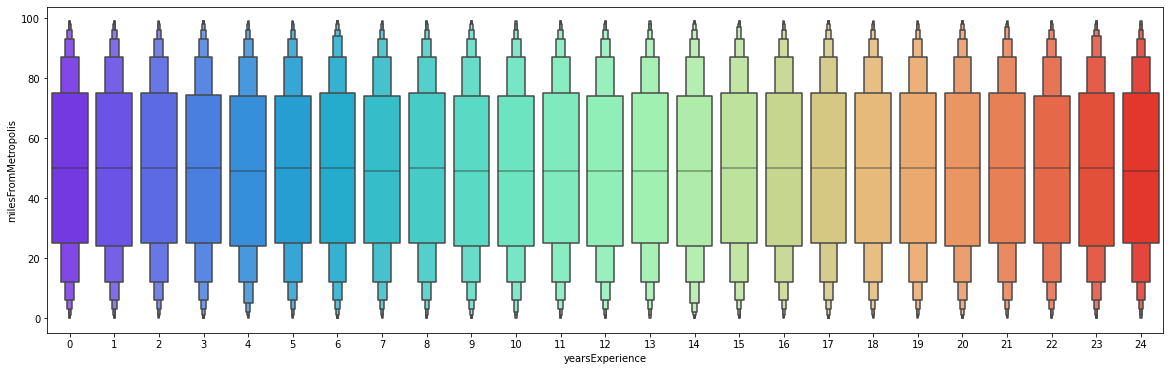

In [40]:
# boxen plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize=(20,6))
sns.boxenplot(x='yearsExperience', y='milesFromMetropolis', data=train, palette='rainbow')

from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

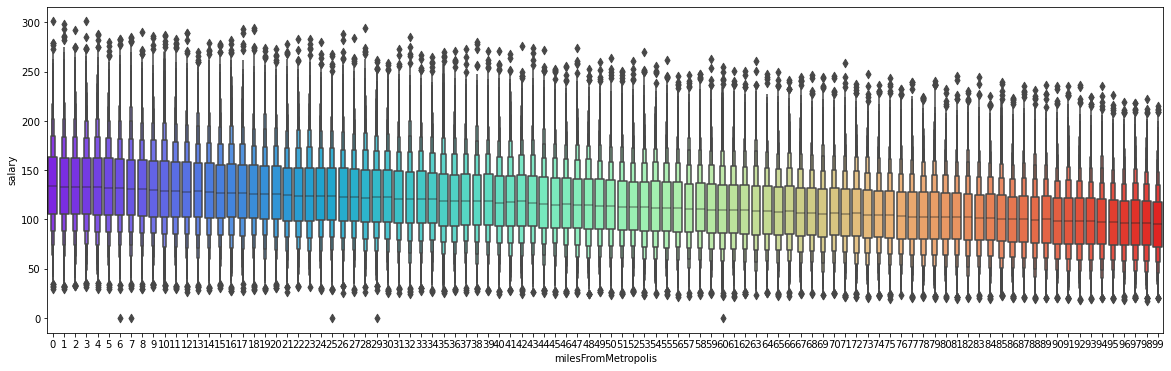

In [41]:
# boxen plot for milesFromMetropolis from salary columns
plt.figure(figsize=(20,6))
sns.boxenplot(y='salary', x='milesFromMetropolis', data=train, palette='rainbow')

from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

# Point Plot


1. A point plot uses scatter plot glyphs to visualize features like point estimates and confidence intervals.

2. A point plot uses scatter plot points to represent the central tendency of numeric data.

3. These plots make use of error bars to indicate any uncertainty around the numeric

<AxesSubplot:xlabel='yearsExperience', ylabel='milesFromMetropolis'>

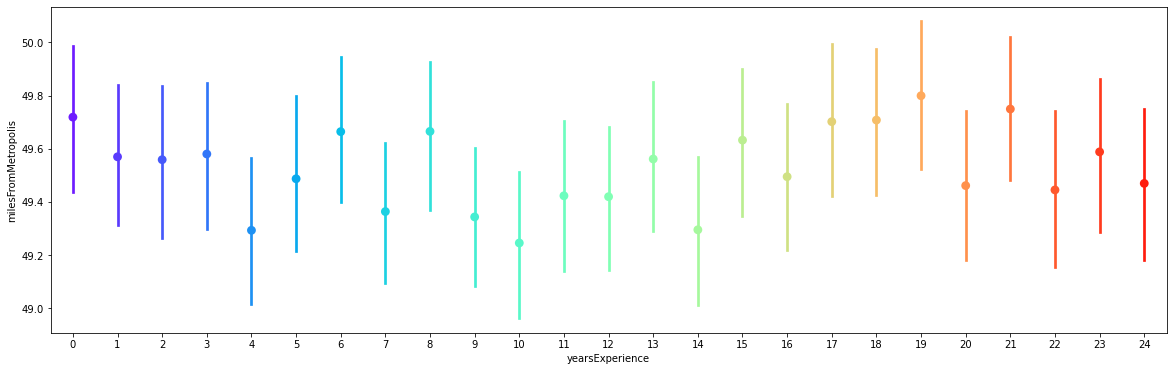

In [42]:
# point plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize=(20,6))
sns.pointplot(x='yearsExperience', y='milesFromMetropolis', data=train, palette='rainbow')

From above point plot

The error bar shows that there is variability of association with each Y and X center point value. that is the milesFromMetropolis has dispersion of vales for each yearsExperience value

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

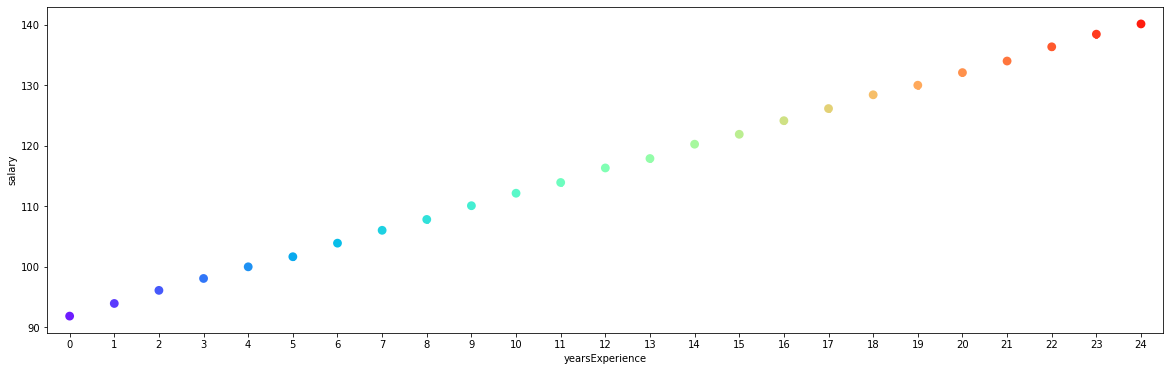

In [43]:
# point plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.pointplot(x='yearsExperience', y='salary', data=train, palette='rainbow')

# From above point plot

There is a increase in salary when there is a increase in yearsExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

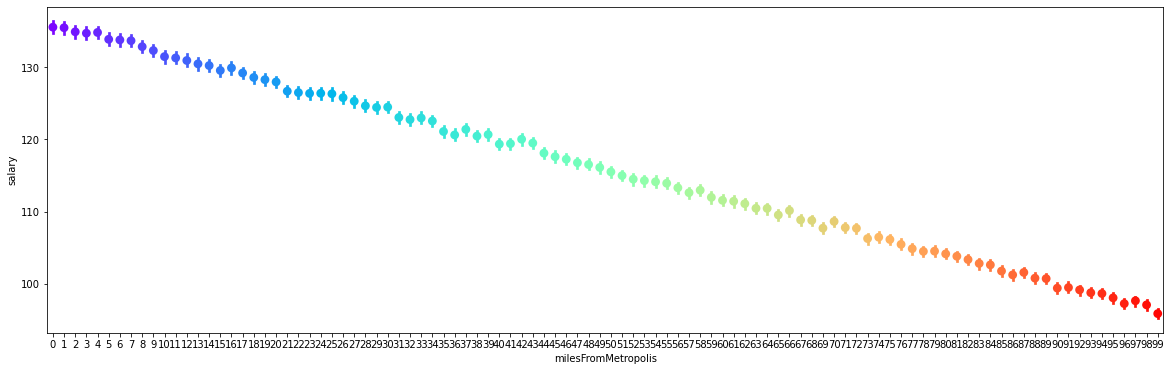

In [44]:
# point plot for milesFromMetropolis from salary columns
plt.figure(figsize=(20,6))
sns.pointplot(x='milesFromMetropolis', y='salary', data=train, palette='rainbow')

From above point plot

There is a decrease in salary when there is a decrease in yearsExperience

#  Count Plot
1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.


<AxesSubplot:xlabel='yearsExperience', ylabel='count'>

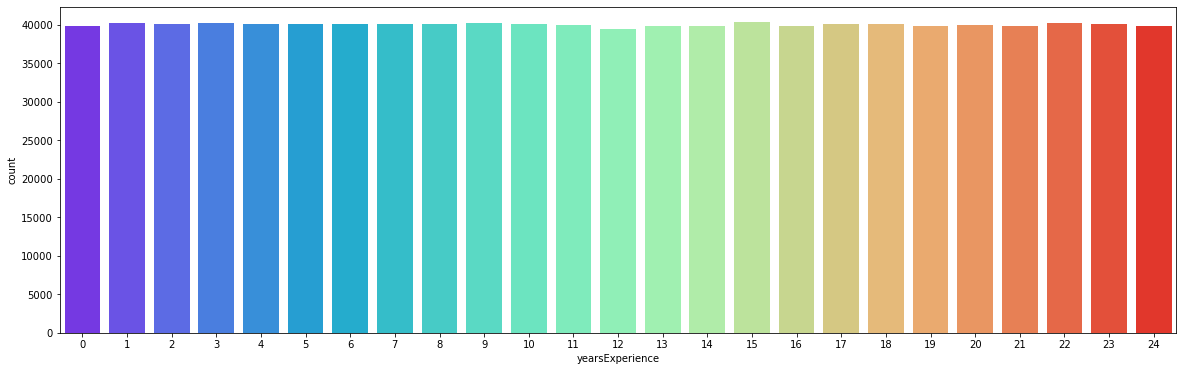

In [45]:
# count plot of whole datset based on yearsExperience
plt.figure(figsize=(20,6))
sns.countplot(train['yearsExperience'],palette='rainbow')

From above count plot

distribution of values of yearExperience is equal over complete dataset, symmetrical.

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='count'>

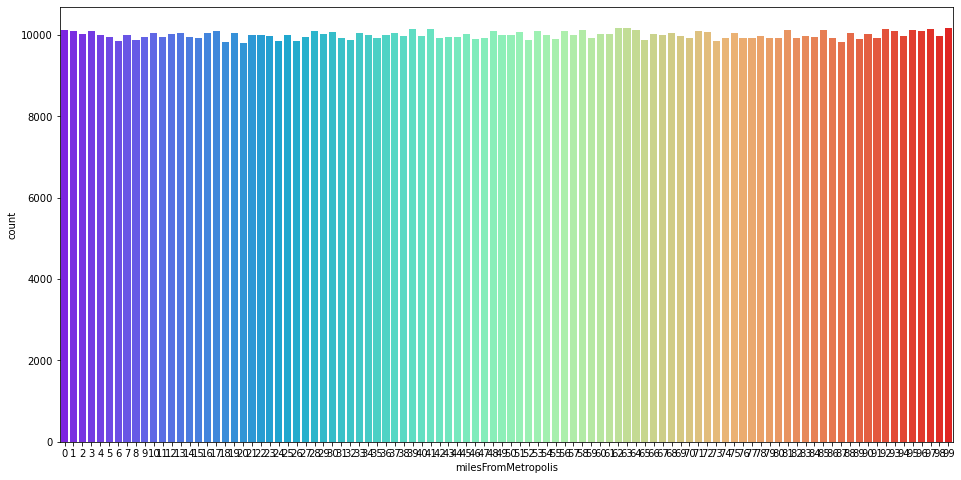

In [46]:
# count plot of whole datset based on milesFromMetropolis
plt.figure(figsize=(16,8))
sns.countplot(train['milesFromMetropolis'],palette='rainbow')

From above count plot

distribution of values of milesFromMetropolis is almost equal over complete dataset, symmetrical

<AxesSubplot:xlabel='salary', ylabel='count'>

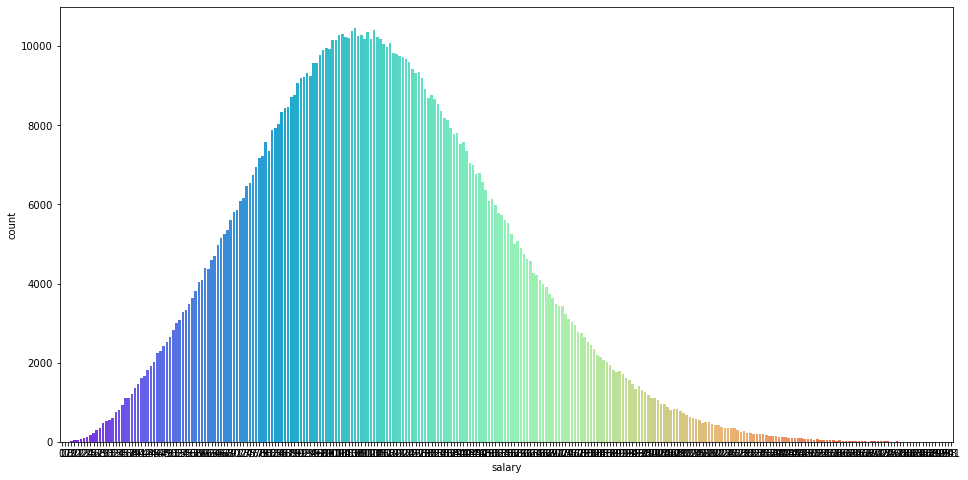

In [47]:
# count plot of whole datset based on salary
plt.figure(figsize=(16,8))
sns.countplot(train['salary'],palette='rainbow')

From above count plot

distribution of values of yearExperience is symmetrical, unimodal.

#  Subset of train dataset

ploting process of swarm plot was taking huge time because of large dataset.

So, we take a subset of 50000 samples from train datset and plot it for interpretation.

# Swarm Plot



1. The swarm plot is a type of scatter plot, but helps in visualizing different categorical variables.

2. Scatter plots generally plots based on numeric values, but most of the data analyses happens on categorical variables. So, swarm plots seem very useful in those cases.


In [48]:
# swarm plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize=(20,6))
sns.swarmplot(x='yearsExperience', y='milesFromMetropolis', data=train[:50000], palette='rainbow')

<AxesSubplot:xlabel='yearsExperience', ylabel='milesFromMetropolis'>

# From above swarm plot

distribution of values of yearExperience with respect to milesFromMetropolis is equal over complete dataset, symmetrical.

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

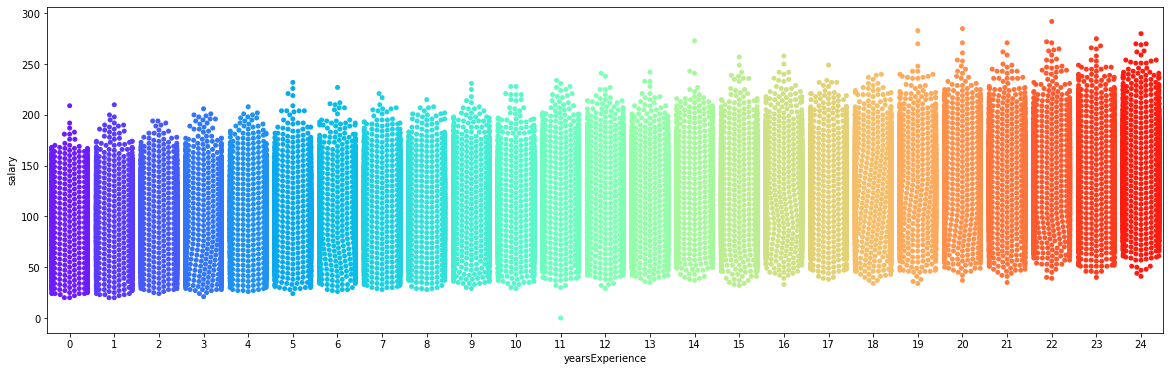

In [49]:
# swarm plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.swarmplot(x='yearsExperience', y='salary', data=train[:50000], palette='rainbow')

# from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

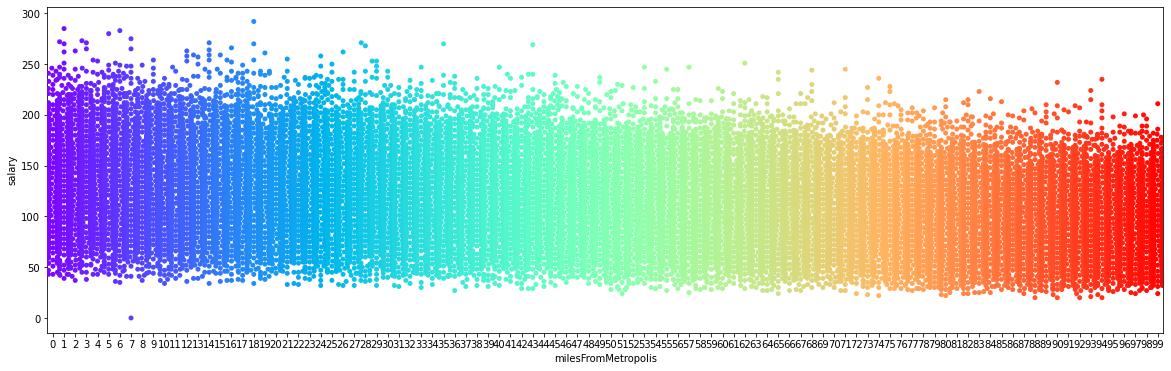

In [50]:
# swarm plot for milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))
sns.swarmplot(x='milesFromMetropolis', y='salary', data=train[:50000], palette='rainbow')

# from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

#  Combine plot

Combination of boxenplot and swarm plot

<AxesSubplot:xlabel='yearsExperience', ylabel='milesFromMetropolis'>

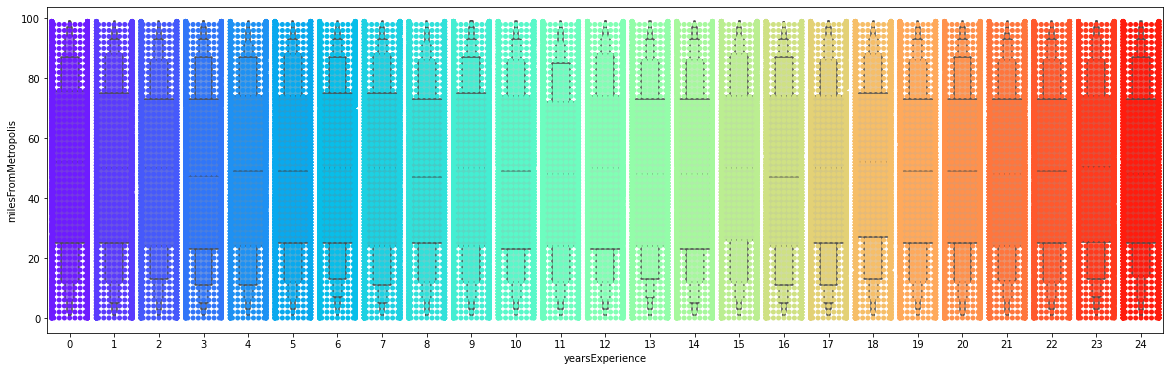

In [51]:
# combine boxen and swarm plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize=(20,6))
sns.swarmplot(x='yearsExperience', y='milesFromMetropolis', data=train[:50000], palette='rainbow')
sns.boxenplot(x='yearsExperience', y='milesFromMetropolis', data=train[:50000], palette='rainbow')

From above combine plot

distribution of values of yearExperience with respect to milesFromMetropolis is equal over complete dataset, symmetrical.

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

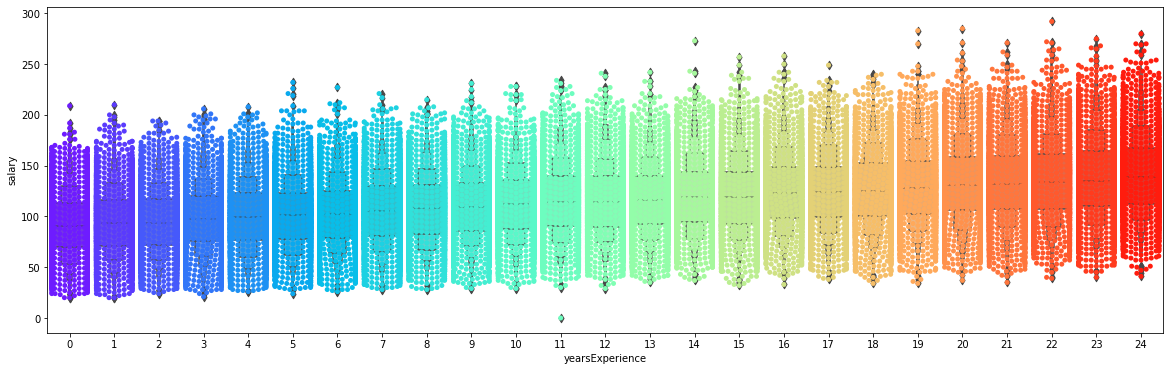

In [52]:
# combine boxen and swarm plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.swarmplot(x='yearsExperience', y='salary', data=train[:50000], palette='rainbow')
sns.boxenplot(x='yearsExperience', y='salary', data=train[:50000], palette='rainbow')

from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

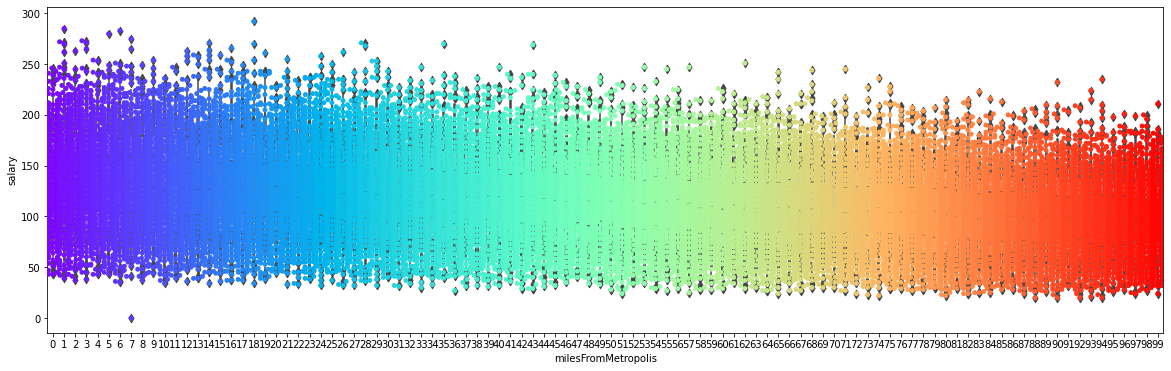

In [53]:
# combine boxen and swarm plot for milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))
sns.swarmplot(x='milesFromMetropolis', y='salary', data=train[:50000], palette='rainbow')
sns.boxenplot(x='milesFromMetropolis', y='salary', data=train[:50000], palette='rainbow')

# from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

# Strip Plot

A strip plot is a graphical data anlysis technique for summarizing a univariate data set. The strip plot consists of:

    1. Horizontal axis = the value of the response variable;
    2. Verticalal axis = all values are set to 1.

That is, a strip plot is simply a plot of the sorted response values along one axis. The strip plot is an alternative to a histogram or a density plot. It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets). 

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

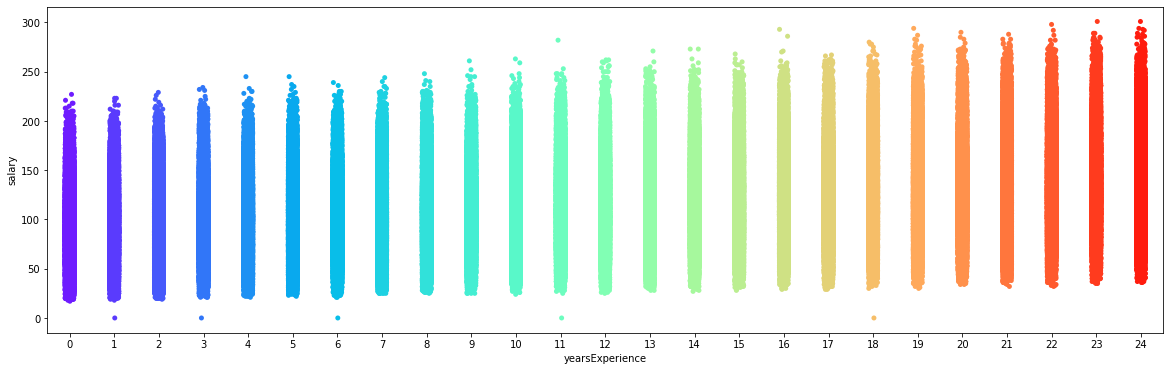

In [54]:
# strip plot between yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.stripplot(x='yearsExperience', y='salary', data=train, palette='rainbow')

from above strip plot:

Distribution of values of Salary increases for increase in values of yearsExperience

<AxesSubplot:xlabel='yearsExperience', ylabel='milesFromMetropolis'>

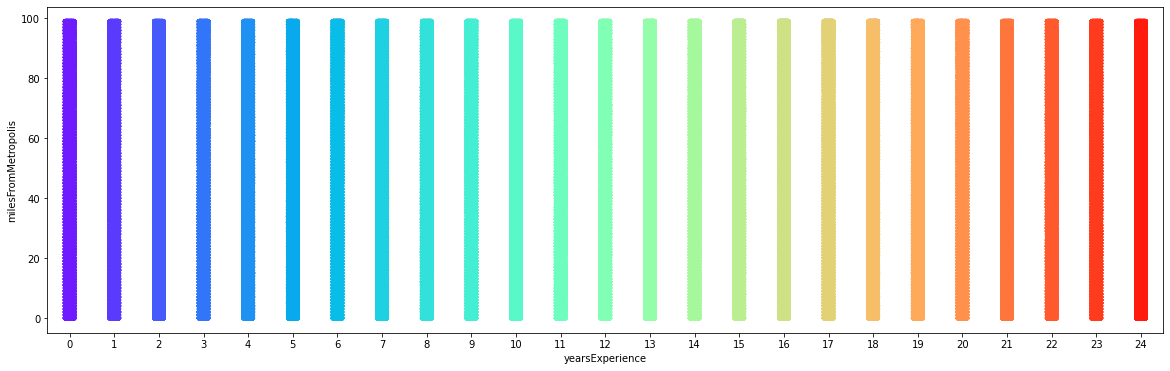

In [55]:
# strip plot between milesFromMetropolis and yearsExperience columns
plt.figure(figsize=(20,6))
sns.stripplot(x='yearsExperience', y='milesFromMetropolis', data=train, palette='rainbow')

from above strip plot:

Distribution of values of mileFromMetropolis is equal for each values of yearsExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

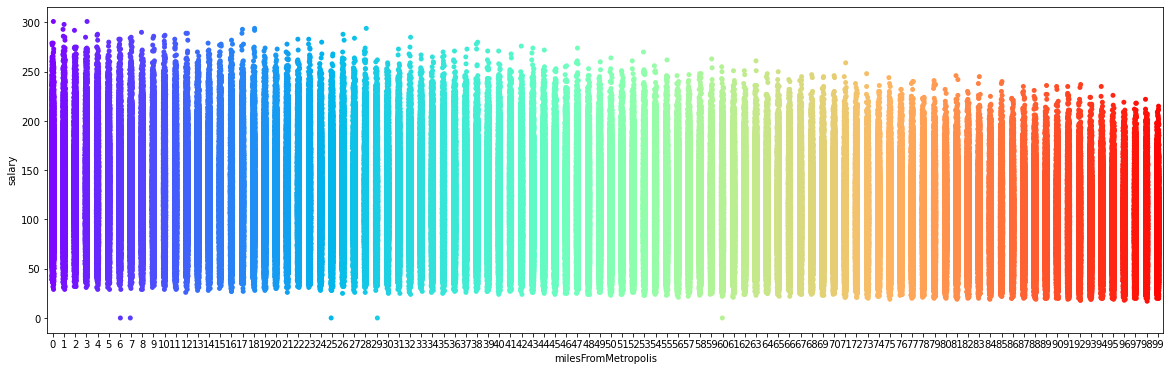

In [56]:
# strip plot between milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))
sns.stripplot(x='milesFromMetropolis', y='salary', data=train, palette='rainbow')

from above strip plot:

Distribution of values of Salary decreases for increase in values of milesFromMetropolis

# Variance inflation factor (VIF)

1. The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in a model. 
2. It is used for diagnosing collinearity/multicollinearity. 
3. Higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a model.

In [57]:
# import statsmodle library for vif 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
# creating a dataframe of just numerical values from train_dataset
data=pd.DataFrame(train[numerical_col],columns=numerical_col)
# target values from train_dataset
salary= train['salary']
# numerical values column names
numerical=[i for i in numerical_col if i!='salary']
numerical

['yearsExperience', 'milesFromMetropolis']

In [59]:
import statsmodels.api as sm
# loop for calculating VIF for each feature.
for i in range(0,len(numerical)):

  # taking one column as target variable
  y=data['salary']
  # taking all other remaining columns as fetaure variable
  x=data[numerical]
  # Instantiating the statsmodel
  model=sm.OLS(y,x)
  # fiting the OLS model on y and x
  result=model.fit()
  # geting the r^2 value of results.
  r_squrd=result.rsquared
  # calculating vif value
  vif=round(1/(1-r_squrd),2)
print('R Square value of {}yearsExperience columns is {} keeping all other columns as features'.format(numerical[i],round(r_squrd,2)))
print('Variance inflation Factor of {}yearsExperience columns is{} \n'.format(numerical[i],vif))

R Square value of milesFromMetropolisyearsExperience columns is 0.8 keeping all other columns as features
Variance inflation Factor of milesFromMetropolisyearsExperience columns is4.96 



# ANOVA Test

Before we perform the hypothesis test, we check if the assumptions for the one-way ANOVA hypothesis test are fulfilled. The samples are random and independent samples. Now, we check the normality assumption by plotting a normal probability plot (Q-Q plots) for each grouped variable.

# Homogeneity of variance Assumption Check

# Hypothesis Testing

According to five steps process of hypothesis testing:
H₀: μ₁= μ₂ = μ₃ = … = μ₆
H₁: Not all salary means are equal
α = 0.05
According to F test statistics:

In [60]:
from scipy import stats

In [61]:
# function to perform anova test between two variables.
def perform_anova(x,y):
    # creating dataframe of two variables of interest
    train_anova = train[[x,y]]
    # gouping the data in new dataframe
    group = train_anova.groupby(x).count().reset_index()
    # print grouped data
    print(group)
    # getting list of unique values from new dataframe for first variable
    unique_majors = train_anova[x].unique()
    # looping through each value present in list of unique values to plot probplot
    for major in unique_majors:
        stats.probplot(train_anova[train_anova[x] == major][y],dist='norm',plot=plt)
        plt.title("Probability Plot - " +  major)
        plt.show()
    # calculate ratio of the largest to the smallest sample standard deviation
        ratio = train_anova.groupby(x).std().max() / train_anova.groupby(x).std().min()
    print(ratio)
      # Create ANOVA backbone table with empty string value, columns names -> 'Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit'
    data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']]
    anova_table = pd.DataFrame(data,columns = ['Source of Variation','SS','df','MS','F','P-value','F crit'])
    anova_table.set_index('Source of Variation',inplace = True)
    x_bar = train_anova[y].mean()
     # calculate SSTR and update anova table, with Source of variation = 'Between Groups'
  
    SSTR = train_anova.groupby(x).count() * (train_anova.groupby(x).mean() - x_bar)**2
    anova_table['SS']['Between Groups'] = SSTR[y].sum()
    SSE = (train_anova.groupby(x).count() - 1) * train_anova.groupby(x).std()**2
    # calculate SSE and update anova table, with Source of variation = 'Within Groups'
    anova_table['SS']['Within Groups'] = SSE[y].sum()
    # calculate SSTR and update anova table, with Source of variation = 'Total'
    SSTR = SSTR[y].sum() + SSE[y].sum()
    anova_table['SS']['Total'] = SSTR
    # update degree of freedom, for each groups 'Between Groups', 'Within Groups', 'Total'
    anova_table['df']['Between Groups'] = train_anova[x].nunique() - 1
    anova_table['df']['Within Groups'] = train_anova.shape[0] - train_anova[x].nunique()
    anova_table['df']['Total'] = train_anova.shape[0] - 1
     # calculate MS
    anova_table['MS'] = anova_table['SS'] / anova_table['df']
    F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
    # calculate F 
    anova_table['F']['Between Groups'] = F
    anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F,anova_table['df']['Between Groups'],anova_table['df']['Within Groups'])
    # p-value
    alpha = 0.05
    tail_hypothesis_type = "two-tailed"
    if tail_hypothesis_type == "two-tailed":
        alpha /= 2
    anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'],anova_table['df']['Within Groups'])
    print(anova_table)
    print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
    conclusion = "Failed to reject the null hypothesis."
    if anova_table['P-value']['Between Groups'] <= alpha:
        conclusion = "Null Hypothesis is rejected."
    print("F-score is:", anova_table['F']['Between Groups'],
          " and p value is:",anova_table['P-value']['Between Groups'])    
    print(conclusion)
      
  # The critical value approach
    print("\n--------------------------------------------------------------------------------------")
    print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
    conclusion = "Failed to reject the null hypothesis."
    if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
        conclusion = "Null Hypothesis is rejected."
    print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
    print(conclusion)
  

         major  salary
0      BIOLOGY   58379
1     BUSINESS   58518
2    CHEMISTRY   58875
3      COMPSCI   58382
4  ENGINEERING   58596
5   LITERATURE   58684
6         MATH   57801
7         NONE  532355
8      PHYSICS   58410


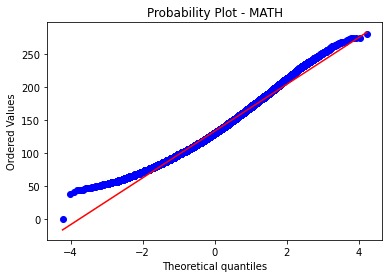

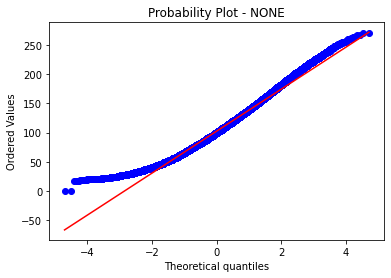

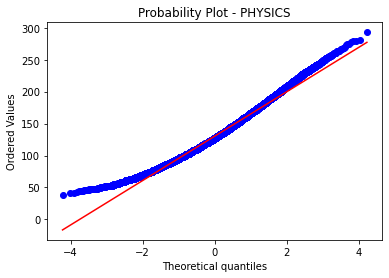

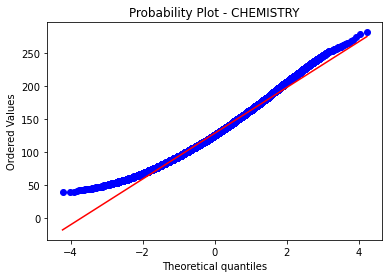

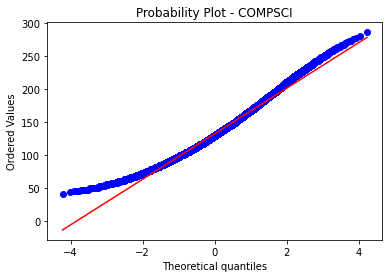

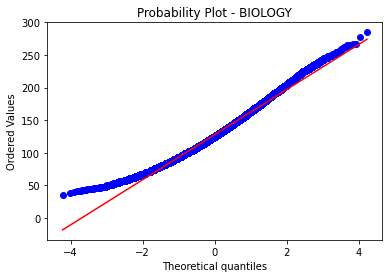

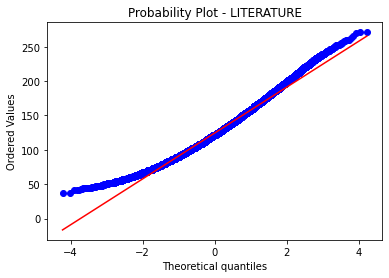

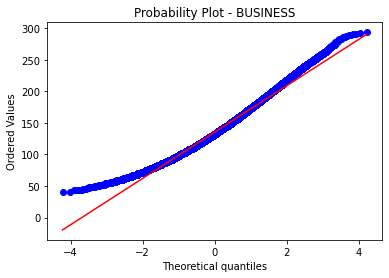

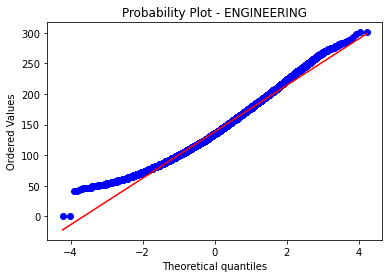

salary    1.137312
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        214940060.760225       8  26867507.595028  20922.428835   
Within Groups        1284137037.774666  999991      1284.148595                 
Total                1499077098.534891  999999      1499.078598                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.191831  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 20922.428835180388  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 2

In [62]:
# perform anova test on major and salary
perform_anova('major','salary')

          jobType  salary
0             CEO  124778
1             CFO  124369
2             CTO  125046
3         JANITOR  124971
4          JUNIOR  124594
5         MANAGER  125121
6          SENIOR  125886
7  VICE_PRESIDENT  125235


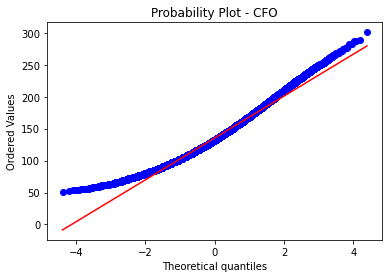

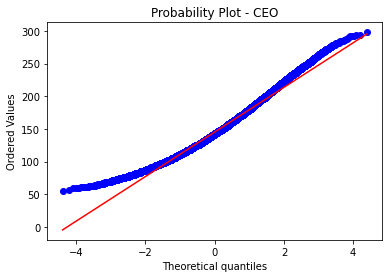

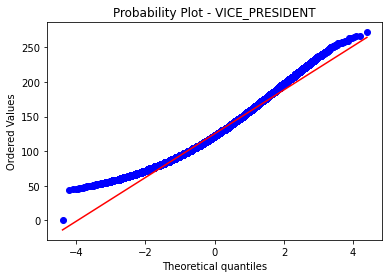

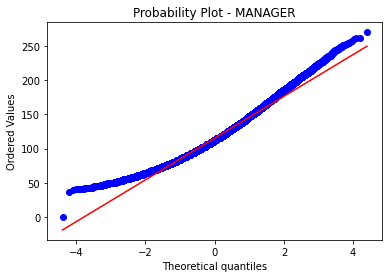

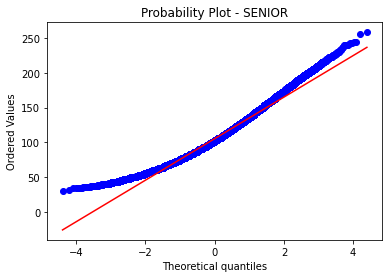

salary    1.3969
dtype: float64
                                    SS      df              MS             F  \
Source of Variation                                                            
Between Groups        535091060.072659       7  76441580.01038  79296.758903   
Within Groups         963986038.462213  999992       963.99375                 
Total                1499077098.534871  999999     1499.078598                 

                    P-value   F crit  
Source of Variation                   
Between Groups          0.0  2.28755  
Within Groups                         
Total                                 
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 79296.75890294144  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 79296.75890294

In [63]:
# perform anova test on jobType and salary
perform_anova('jobType','salary')

        degree  salary
0    BACHELORS  175495
1     DOCTORAL  175364
2  HIGH_SCHOOL  236976
3      MASTERS  175311
4         NONE  236854


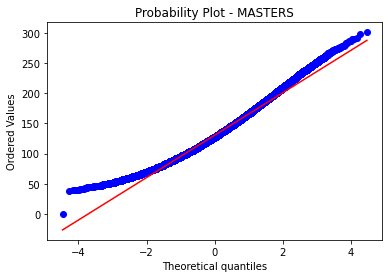

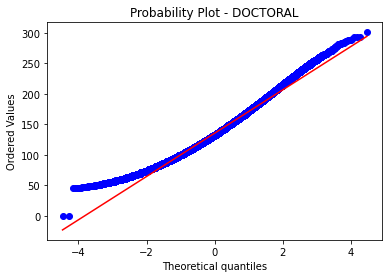

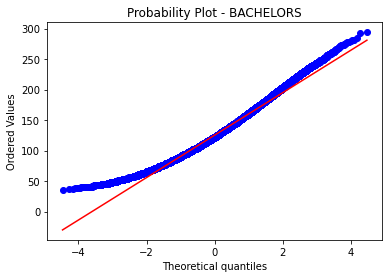

salary    1.034299
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        241396422.297586       4  60349105.574396  47984.202166   
Within Groups        1257680676.237301  999995      1257.686965                 
Total                1499077098.534887  999999      1499.078598                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.785834  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 47984.20216602098  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 47

In [64]:
# perform anova test on degree and salary
perform_anova('degree','salary')

    industry  salary
0       AUTO  142943
1  EDUCATION  142819
2    FINANCE  142867
3     HEALTH  142755
4        OIL  142771
5    SERVICE  142639
6        WEB  143206


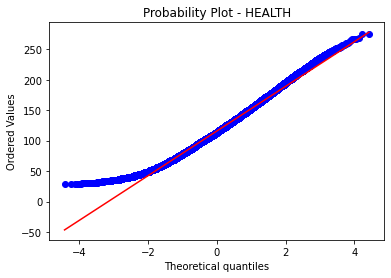

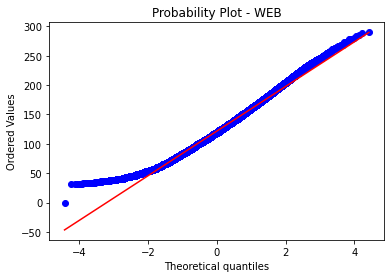

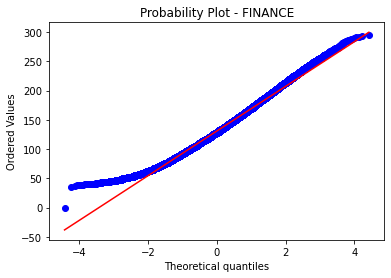

salary    1.0974
dtype: float64
                                    SS      df              MS             F  \
Source of Variation                                                            
Between Groups        131887990.448761       6  21981331.74146  16077.642619   
Within Groups        1367189108.086116  999993     1367.198678                 
Total                1499077098.534877  999999     1499.078598                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.408242  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 16077.64261880987  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 16077.642

In [65]:
# perform anova test on industry and salary
perform_anova('industry','salary')

          jobType  yearsExperience
0             CEO           124778
1             CFO           124369
2             CTO           125046
3         JANITOR           124971
4          JUNIOR           124594
5         MANAGER           125121
6          SENIOR           125886
7  VICE_PRESIDENT           125235


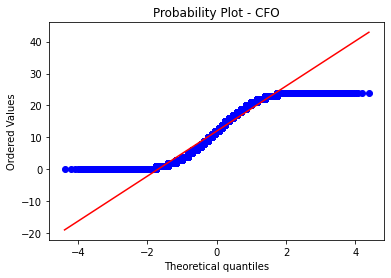

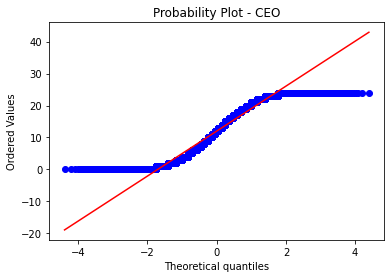

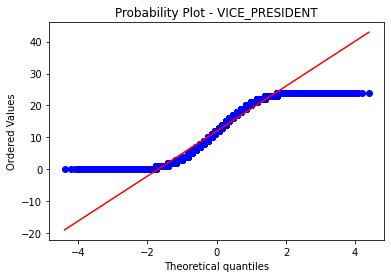

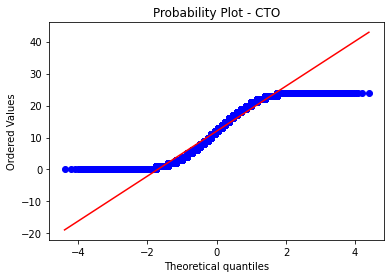

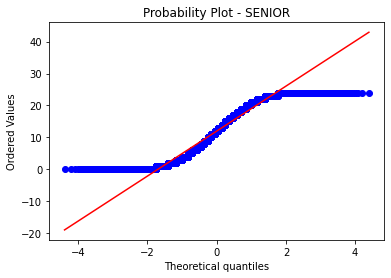

yearsExperience    1.002522
dtype: float64
                                  SS      df         MS         F   P-value  \
Source of Variation                                                           
Between Groups            117.457034       7  16.779576  0.322567  0.944194   
Within Groups        52018412.569971  999992  52.018829                       
Total                52018530.027004  999999  52.018582                       

                      F crit  
Source of Variation           
Between Groups       2.28755  
Within Groups                 
Total                         
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 0.3225673597094048  and p value is: 0.9441941901986974
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 0.3225673597094048  and critical value is:

In [66]:
# perform anova test on jobType and yearsExperience
perform_anova('jobType','yearsExperience')

        degree  yearsExperience
0    BACHELORS           175495
1     DOCTORAL           175364
2  HIGH_SCHOOL           236976
3      MASTERS           175311
4         NONE           236854


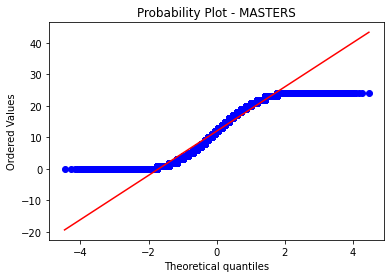

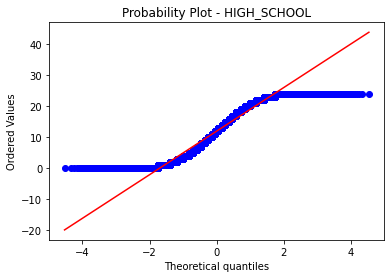

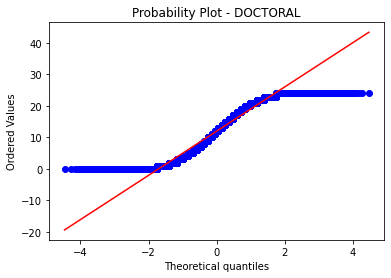

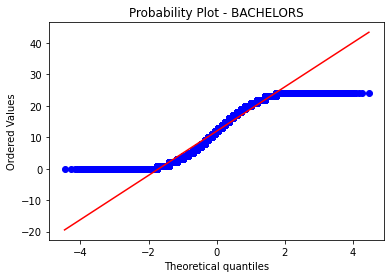

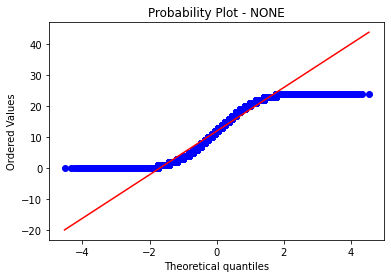

yearsExperience    1.002005
dtype: float64
                                  SS      df         MS         F   P-value  \
Source of Variation                                                           
Between Groups             40.221125       4  10.055281  0.193301  0.942004   
Within Groups         52018489.80588  999995   52.01875                       
Total                52018530.027004  999999  52.018582                       

                       F crit  
Source of Variation            
Between Groups       2.785834  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 0.19330109231773057  and p value is: 0.9420038025970138
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 0.19330109231773057  and critical va

In [67]:
# perform anova test on degree and yearsExperience
perform_anova('degree','yearsExperience')


         major  yearsExperience
0      BIOLOGY            58379
1     BUSINESS            58518
2    CHEMISTRY            58875
3      COMPSCI            58382
4  ENGINEERING            58596
5   LITERATURE            58684
6         MATH            57801
7         NONE           532355
8      PHYSICS            58410


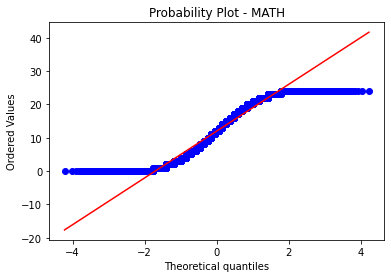

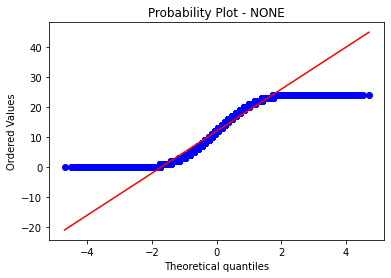

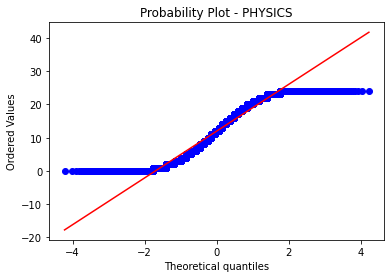

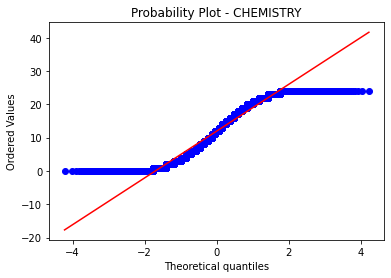

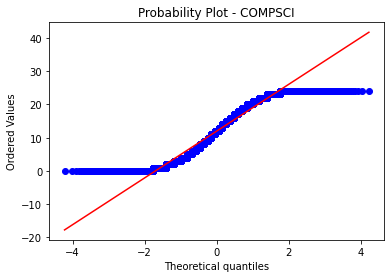

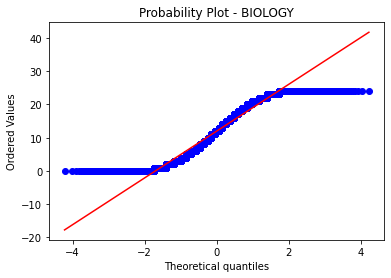

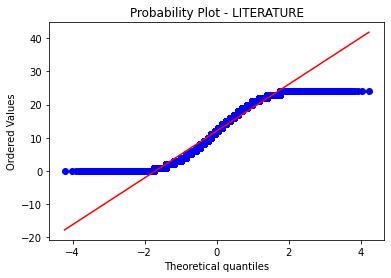

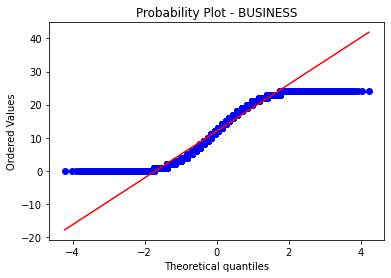

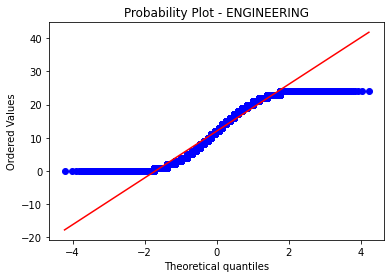

yearsExperience    1.006637
dtype: float64
                                  SS      df         MS         F   P-value  \
Source of Variation                                                           
Between Groups             73.972363       8   9.246545  0.177753  0.993928   
Within Groups        52018456.054641  999991  52.018924                       
Total                52018530.027005  999999  52.018582                       

                       F crit  
Source of Variation            
Between Groups       2.191831  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 0.17775349187267195  and p value is: 0.9939281417130893
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 0.17775349187267195  and critical va

In [68]:
# perform anova test on major and yearsExperience
perform_anova('major','yearsExperience')

    industry  yearsExperience
0       AUTO           142943
1  EDUCATION           142819
2    FINANCE           142867
3     HEALTH           142755
4        OIL           142771
5    SERVICE           142639
6        WEB           143206


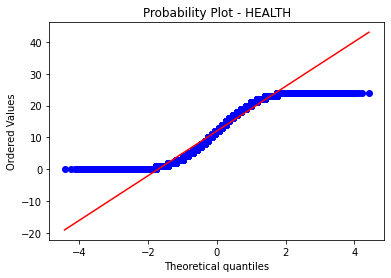

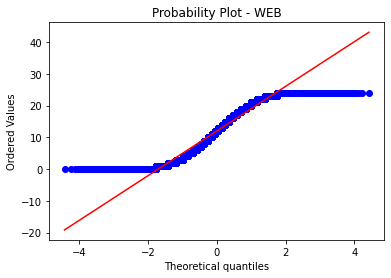

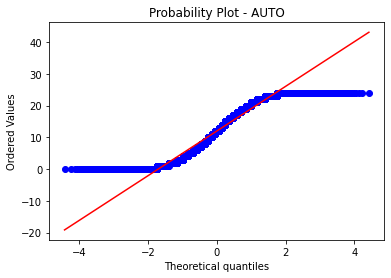

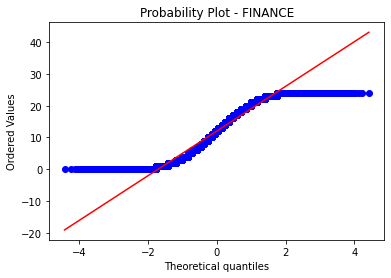

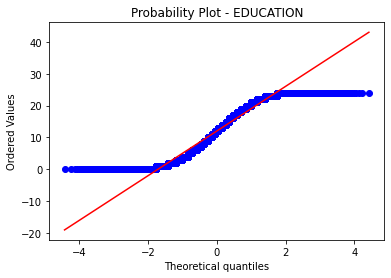

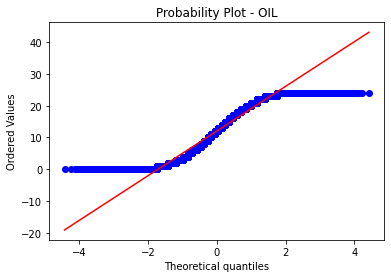

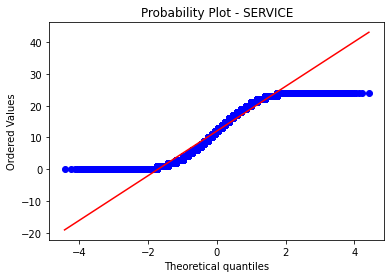

yearsExperience    1.002384
dtype: float64
                                  SS      df         MS         F   P-value  \
Source of Variation                                                           
Between Groups            182.340098       6  30.390016  0.584213  0.743267   
Within Groups        52018347.686906  999993  52.018712                       
Total                52018530.027004  999999  52.018582                       

                       F crit  
Source of Variation            
Between Groups       2.408242  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 0.5842131652958172  and p value is: 0.7432671010723688
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 0.5842131652958172  and critical valu

In [69]:
# perform anova test on industry and yearsExperience
perform_anova('industry','yearsExperience')

# Dendrogram

The dendrogram is a visual representation of the compound correlation data. The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes. Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node.

In [70]:
# Plot a Dendrogram on the columns of the dataset (use 50000 sample of 1000000)
import scipy
from scipy.cluster import hierarchy as hc
x=train[1:50000]
corr=np.round(scipy.stats.spearmanr(x).correlation, 4)
corr_condused=hc.distance.squareform(1-corr)
z=hc.linkage(corr_condused,method='average')
fig=plt.figure(figsize=(16,7))
dendrogram=hc.dendrogram(z,labels=x.columns, orientation='left', leaf_font_size=16)
plt.show()

observation from dendrogram

Strongly correlated variables:
1. major and degree
2. salary and yearsExperience

#  Since, there are no missing values and all the data are distributed equally. We can start converting the categoricl values to numerical.

#  Scaling

#  Why scaling is necessary?

* Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem.
* If left alone, these algorithms only take in the magnitude of features neglecting the units. 
* The results would vary greatly between different units, 5kg and 5000gms. 
* The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes. 
* To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by scaling.

In [71]:
# Helper function for scaling all the numerical data using MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
def scaled(data,cols):
    data=data[cols]
    trans=MinMaxScaler()
    data=trans.fit_transform(data)
    scaled_data=pd.DataFrame(data)
    scaled_data.columns=['yearsExperience','milesFromMetropolis','salary']
    return scaled_data

In [72]:
# Making a list of the column names to be scaled 
cols=[i for i in train.columns if train[i].dtypes!='object']
# passing data and column name for scaling
scaled_data=scaled(train,cols)

# Modelling

# One-hot-encoding

A one-hot encoding can be applied to the categorical representation. This is where the categorical variable is removed and a new binary variable is added for each unique categorical value.

In [73]:
# Importing OneHotEncoder for encoding the categorical data
from sklearn.preprocessing import OneHotEncoder as ohe
class OneHotEncoder(ohe):   # class inherits from sklearn.preprocessing.OneHotEncode
    def __init__(self,**kwargs):
        super(OneHotEncoder,self).__init__(**kwargs)
        self.fit_flag = False   # check on encoder fitting
    
    # helper function to fit data  
    def fit(self,X,**kwargs):
        out = super().fit(X)   # acessing fit method from sklearn.preprocessing.OneHotEncode
        self.fit_flag = True
        return out
     
    # helper function to transform data  
    def transform(self,X,**kwargs):
        sparse_matrix = super(OneHotEncoder,self).transform(X)
        transf_columns = self.transf_columns_name(X=X)
        d_out = pd.DataFrame(sparse_matrix.toarray(),columns=transf_columns,index=X.index) # making Df using col names returned by transf_columns_name method 
        return d_out

    # helper function to fit and transform data 
    def fit_transform(self,X,**kwargs):
        self.fit(X)
        return self.transform(X)
    
    # helper function to get new column names after fitting and tranforming data from sklearn.preprocessing import OneHotEncoder
    def transf_columns_name(self,X):
        transf_columns = []  
        for col_indx,col_name in enumerate(X.columns):
            counter = 0
            while counter < len(self.categories_[col_indx]):
                transf_columns.append(f'{col_name}-{self.categories_[col_indx][counter]}')
                counter += 1
        return transf_columns

In [74]:
# Split the features and the target
features=train[categorical_col]
target=scaled_data.salary

In [75]:
# Features
features.head().style.background_gradient(cmap='yellow')

In [76]:
# Target
target.head()

0    0.431894
1    0.335548
2    0.455150
3    0.471761
4    0.541528
Name: salary, dtype: float64

In [77]:
# passing features dataframe for one hot encoding process
encoder_1hot = OneHotEncoder()
encoded_features = encoder_1hot.fit_transform(features)
scaled = scaled_data[['yearsExperience','milesFromMetropolis']]
encoded_features = pd.concat([encoded_features,scaled],axis=1)
encoded_features.head()

jobType-CEO  jobType-CFO  jobType-CTO  jobType-JANITOR  jobType-JUNIOR  \
0          0.0          1.0          0.0              0.0             0.0   
1          1.0          0.0          0.0              0.0             0.0   
2          0.0          0.0          0.0              0.0             0.0   
3          0.0          0.0          0.0              0.0             0.0   
4          0.0          0.0          0.0              0.0             0.0   

   jobType-MANAGER  jobType-SENIOR  jobType-VICE_PRESIDENT  degree-BACHELORS  \
0              0.0             0.0                     0.0               0.0   
1              0.0             0.0                     0.0               0.0   
2              0.0             0.0                     1.0               0.0   
3              1.0             0.0                     0.0               0.0   
4              0.0             0.0                     1.0               1.0   

   degree-DOCTORAL  ...  major-PHYSICS  industry-AUTO  industry-EDUCATION  \
0              0.0  ...            0.0            0.0                 0.0   
1              0.0  ...            0.0            0.0                 0.0   
2              1.0  ...            1.0            0.0                 0.0   
3              1.0  ...            0.0            1.0                 0.0   
4              0.0  ...            1.0            0.0                 0.0   

   industry-FINANCE  industry-HEALTH  industry-OIL  industry-SERVICE  \
0               0.0              1.0           0.0               0.0   
1               0.0              0.0           0.0               0.0   
2               0.0              1.0           0.0               0.0   
3               0.0              0.0           0.0               0.0   
4               1.0              0.0           0.0               0.0   

   industry-WEB  yearsExperience  milesFromMetropolis  
0           0.0         0.416667             0.838384  
1           1.0         0.125000             0.737374  
2           0.0         0.416667             0.383838  
3           0.0         0.333333             0.171717  
4           0.0         0.333333             0.161616  

[5 rows x 31 columns]

In [78]:
#take the 50000 features for targets and encoded
encoded_features = encoded_features[:50000]
target = target[:50000]

In [79]:
#importing Sklearn library for spliting train dataset into train and test dataset
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(encoded_features,target,test_size=0.3,random_state=108)

In [80]:
# importing necessary libraries for geting metrics of models
from sklearn.metrics import mean_squared_error,r2_score
def root_mean_squared_error(y_true,y_pred):
    # initially say no error
    eroor = 0 
    # loop for all samples in true and pred list
    for ytr,ypr in zip(y_true,y_pred):
        # calcuting sqrd error and add to error with root
        eroor += (ytr-ypr)**2
    # calcuting mean error
    return f'Test RMSE: {np.sqrt(eroor / len(y_true))}'
def mean_squared_error(y_true,y_pred):
                                
    # initially say no error
    eroor = 0 
    # loop for all samples in true and pred list
    for ytr,ypr in zip(y_true,y_pred):
        # calcuting sqrd error and add to error
        eroor += (ytr-ypr)**2
    # return mean error
    return f'Test MSE: {eroor / len(y_true)}'

## Function to calculate mae   
def mean_absolute_error(y_true,y_pred):
    error = 0
    for ytr, ypr in zip(y_true,y_pred):
        error += np.abs(ytr - ypr)
    return f'Test MAE: {error / len(y_true)}'
def r2_scr(y_true,y_pred):
    nume = 0
    den = 0
    true_value_mean = np.mean(y_true)
    for ytr,ypr in zip(y_true,y_pred):
        # updating nume
        nume += (ytr-ypr)**2 
        # updating den
        den += (ytr-true_value_mean)**2
        ratio = nume / den
    return f'Test r2_scr: {1-ratio}'

In [81]:
def features_imp(x,f_imp):
    # creating dataframe for feature name and feature importance
    features = x.columns
    df = {'features':features,'imp':f_imp}
    df = pd.DataFrame(df)
    # grouping all data and sorting in descending order
    df = df.sort_values('imp',ascending=False,ignore_index=True)
    print()
    # ploting feature importance data using boxenplot
    fig,ax = plt.subplots(figsize=(12,6))
    ax = sns.boxenplot(x='imp',y='features',data=df)
    ax.grid()
    ax.set_title('importance')
    ax.set_xlabel('feature importance')
    ax.set_ylabel('column')
    # return fig, ax
    return fig,ax

# NOTE:
The employee salaries dataset has 1000000 samples.

We have used only 50000 samples for training.

If you want you can use complete dataset.

Using complete dataset will take longer time to train the model.

# LinearRegression model

Test RMSE: 0.06521901998957642
Test Score 0.7414325127965932
Train Score 0.741335007288243
Test MSE: 0.0042535205684007685
Test r2_scr: 0.7414325127965926
Test MAE: 0.05265784277614797



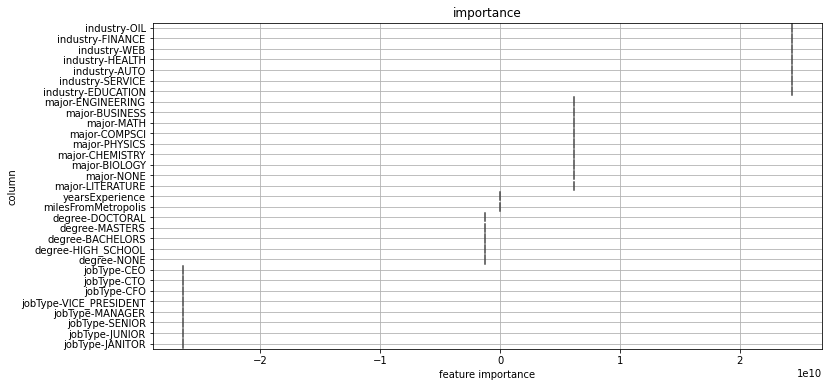

CPU times: user 1.08 s, sys: 68 ms, total: 1.14 s
Wall time: 389 ms


In [82]:
%%time
# Import LinearRegressor
from sklearn.linear_model import LinearRegression
# Fit a Linear Regression model to the train dataset
# Instantiate the model
model=LinearRegression()
# Fit the model to the data
model.fit(train_x,train_y)
coe=model.coef_
# print score of the model by calling function
print(root_mean_squared_error(test_y,model.predict(test_x)))
print('Test Score',model.score(test_x,test_y))
print('Train Score',model.score(train_x,train_y))
print(mean_squared_error(test_y,model.predict(test_x)))
print(r2_scr(test_y,model.predict(test_x)))
print(mean_absolute_error(test_y,model.predict(test_x)))
# visualizing the importance of features.
features_imp(train_x,coe)
plt.show()


#  Random Forest Regressor

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity.

Test RMSE: 0.06819572900023568
Test MSE: 0.004650657453873585
Test r2_scr: 0.7172909376234646
Test Score 0.717290937623464
Train Score 0.9588557055058513
Test MAE: 0.05437061248044431



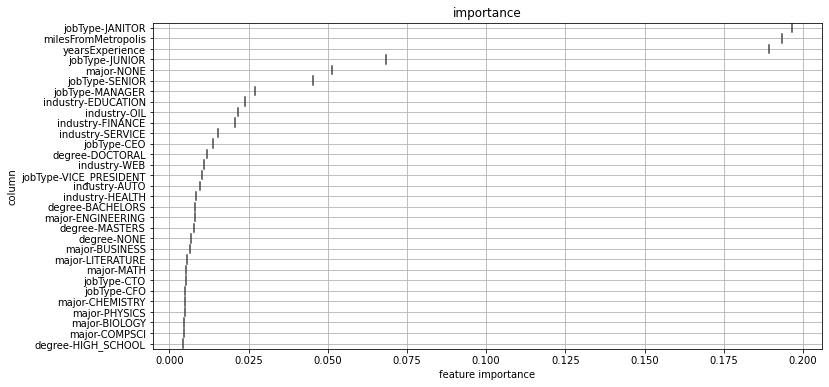

CPU times: user 11.5 s, sys: 68 ms, total: 11.5 s
Wall time: 11.6 s


In [83]:
%%time
# Fit a Random Forest Regressor model to the train dataset
# Import RandomForrestRegressor
from sklearn.ensemble import RandomForestRegressor
# Instantiate the model
model=RandomForestRegressor()
# Fit the model to the data
model.fit(train_x,train_y)
# print score of the model by calling function
coe=model.feature_importances_
print(root_mean_squared_error(test_y,model.predict(test_x)))
print(mean_squared_error(test_y,model.predict(test_x)))
print(r2_scr(test_y,model.predict(test_x)))
print('Test Score',model.score(test_x,test_y))
print('Train Score',model.score(train_x,train_y))
print(mean_absolute_error(test_y,model.predict(test_x)))
# visualizing the importance of features.
features_imp(train_x,coe)
plt.show()

# Gradient Boosting Regressor

Gradient Boosting Algorithm is generally used when we want to decrease the Bias error.
it builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

Test RMSE: 0.06423319243792099
Test MSE: 0.00412590301076699
Test r2_scr: 0.7491902632693519
Test Score 0.7491902632693521
Train Score 0.7515336595855294
Test MAE: 0.051839925996591714



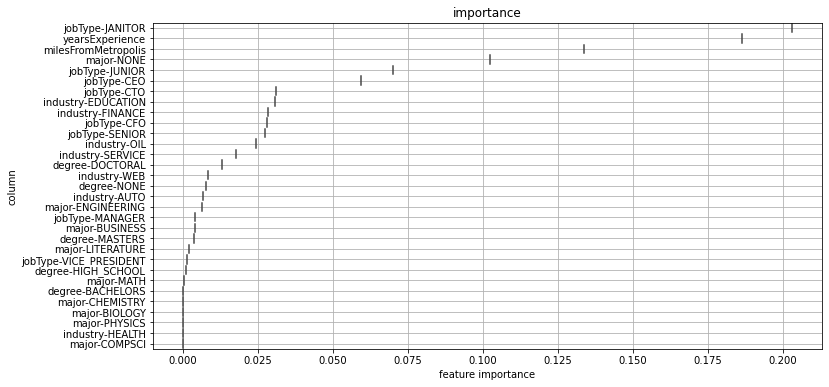

CPU times: user 2.67 s, sys: 4.03 ms, total: 2.68 s
Wall time: 2.67 s


In [84]:
%%time
# Fit a Gradient Boosting Regressor model to the train dataset

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
model=GradientBoostingRegressor()
# Fit the model to the data
model.fit(train_x,train_y)
coe=model.feature_importances_
# print score of the model by calling function
print(root_mean_squared_error(test_y,model.predict(test_x)))
print(mean_squared_error(test_y,model.predict(test_x)))
print(r2_scr(test_y,model.predict(test_x)))
print('Test Score',model.score(test_x,test_y))
print('Train Score',model.score(train_x,train_y))
print(mean_absolute_error(test_y,model.predict(test_x)))
# visualizing the importance of features.
features_imp(train_x,coe)
plt.show()

#  DecisionTree Regressor

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes

In [85]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
# Instantiate the model
model=DecisionTreeRegressor()
# Fit the model to the data
model.fit(train_x,train_y)
coe=model.feature_importances_
# print score of the model by calling function
print(root_mean_squared_error(test_y,model.predict(test_x)))
print(mean_squared_error(test_y,model.predict(test_x)))
print(r2_scr(test_y,model.predict(test_x)))
print('Test Score',model.score(test_x,test_y))
print('Train Score',model.score(train_x,train_y))
print(mean_absolute_error(test_y,model.predict(test_x)))
# visualizing the importance of features.
features_imp(train_x,coe)
plt.show()

Test RMSE: 0.09300936138300726
Test MSE: 0.008650741304874842
Test r2_scr: 0.4741296284622877
Test Score 0.47412962846228945
Train Score 0.9974652739441358
Test MAE: 0.07228132152084672



CPU times: user 486 ms, sys: 8.06 ms, total: 494 ms
Wall time: 489 ms


#  AdaBoost Regressor

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction

In [86]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
# Instantiate the model
model=AdaBoostRegressor()
# Fit the model to the data
model.fit(train_x,train_y)
coe=model.feature_importances_
# print score of the model by calling function
print(root_mean_squared_error(test_y,model.predict(test_x)))
print(mean_squared_error(test_y,model.predict(test_x)))
print(r2_scr(test_y,model.predict(test_x)))
#Let's print the train score and test score
print('Test Score',model.score(test_x,test_y))
print('Train Score',model.score(train_x,train_y))
print(mean_absolute_error(test_y,model.predict(test_x)))
# visualizing the importance of features.
features_imp(train_x,coe)
plt.show()

Test RMSE: 0.08407088046632762
Test MSE: 0.007067912942383545
Test r2_scr: 0.570348265655227
Test Score 0.5703482656552277
Train Score 0.5669190067291436
Test MAE: 0.06992983208039674



CPU times: user 3.44 s, sys: 8.06 ms, total: 3.45 s
Wall time: 3.46 s


#  XGBoost

XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

In [87]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Import XGBRegressor
from xgboost import XGBRegressor
# Instantiate the model
model=XGBRegressor()
# Fit the model to the data
model.fit(train_x,train_y)
coe=model.feature_importances_
# print score of the model by calling function
print(root_mean_squared_error(test_y,model.predict(test_x)))
print(mean_squared_error(test_y,model.predict(test_x)))
print(r2_scr(test_y,model.predict(test_x)))
#Let's print the train score and test score
print('Test Score',model.score(test_x,test_y))
print('Train Score',model.score(train_x,train_y))
print(mean_absolute_error(test_y,model.predict(test_x)))
# visualizing the importance of features.
features_imp(train_x,coe)
plt.show()

Test RMSE: 0.06507333461551257
Test MSE: 0.004234538877982467
Test r2_scr: 0.7425863917811673
Test Score 0.7425863917811675
Train Score 0.8146102653489843
Test MAE: 0.052376121813473266



CPU times: user 18.4 s, sys: 203 ms, total: 18.6 s
Wall time: 3.34 s


#  Light Gradient Boosted Machine

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

Test RMSE: 0.06335048831536988
Test MSE: 0.004013284369795816
Test r2_scr: 0.7560362438023971
Test Score 0.7560362438023971
Train Score 0.7749951758949505
Test MAE: 0.051279359358213934



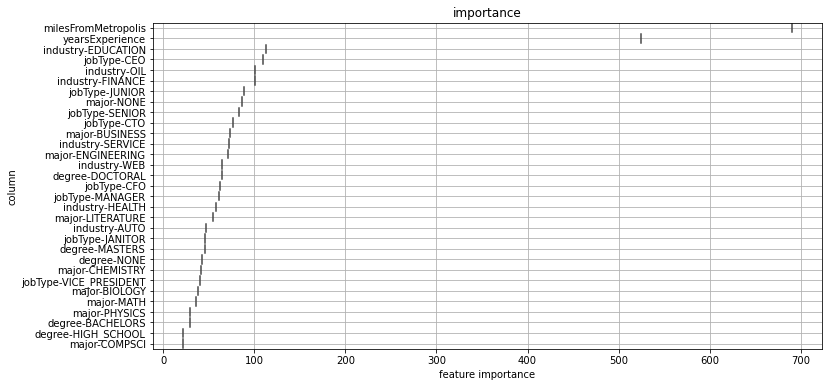

CPU times: user 3.97 s, sys: 52.3 ms, total: 4.03 s
Wall time: 625 ms


In [88]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Import LGBMRegressor
from lightgbm import LGBMRegressor
# Instantiate the model
model=LGBMRegressor()
# Fit the model to the data
model.fit(train_x,train_y)
coe=model.feature_importances_
# print score of the model by calling function
print(root_mean_squared_error(test_y,model.predict(test_x)))
print(mean_squared_error(test_y,model.predict(test_x)))
print(r2_scr(test_y,model.predict(test_x)))
#Let's print the train score and test score
print('Test Score',model.score(test_x,test_y))
print('Train Score',model.score(train_x,train_y))
print(mean_absolute_error(test_y,model.predict(test_x)))
# visualizing the importance of features.
features_imp(train_x,coe)
plt.show()

In [89]:
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE,median_absolute_error as MedAE, r2_score as r2_scr
# Helper function for comparing models metrics
def models_performance(models,models_name,train_x,test_x,train_y,test_y):
    data = {'Metric':['MSE','MAE','MeAE','RMSE','r2_scr']}
    df_train = pd.DataFrame(data)
    df_test = pd.DataFrame(data)

    for (m,model_name) in zip(models,models_name):
        model = m()
        model.fit(train_x,train_y)
        pred_train_y = model.predict(train_x)
        pred_test_y = model.predict(test_x)
        # storing results in list
        results = [MSE(pred_train_y,train_y),MSE(pred_test_y,test_y), MAE(pred_train_y,train_y),MAE(pred_test_y,test_y),
                   MedAE(pred_train_y,train_y),MedAE(pred_test_y,test_y),np.sqrt(MSE(pred_train_y,train_y)),
                   np.sqrt(MSE(pred_test_y,test_y)),r2_scr(pred_train_y,train_y),r2_scr(pred_test_y,test_y)]
        # using indexing grabin train results only
        df_train[model_name] = [results[0],results[2],results[4],results[6],results[8]]
        # using indexing grabin test results only
        df_test[model_name] = [results[1],results[3],results[5],results[7],results[9]]
    return df_train,df_test

In [90]:
models = [LGBMRegressor,XGBRegressor,AdaBoostRegressor,DecisionTreeRegressor,GradientBoostingRegressor,RandomForestRegressor]
models_name = ['LGDM','XGB','AdaBo','DT','GB','RF']

# use function for comparing models by passing list of models object, names, train and test data
train_model_perform,test_model_perform = models_performance(models,models_name,train_x,test_x,train_y,test_y)

In [91]:
train_model_perform

Metric      LGDM       XGB     AdaBo        DT        GB        RF
0     MSE  0.003705  0.003053  0.007252  0.000042  0.004092  0.000673
1     MAE  0.049362  0.044679  0.071257  0.000927  0.051543  0.020483
2    MeAE  0.043068  0.038960  0.066153  0.000000  0.044541  0.017071
3    RMSE  0.060871  0.055253  0.085157  0.006461  0.063966  0.025942
4  r2_scr  0.701249  0.763295  0.099503  0.997459  0.622213  0.951972

In [92]:
test_model_perform

Metric      LGDM       XGB     AdaBo        DT        GB        RF
0     MSE  0.004013  0.004235  0.007149  0.008714  0.004126  0.004658
1     MAE  0.051279  0.052376  0.070514  0.072316  0.051840  0.054424
2    MeAE  0.044538  0.045017  0.065038  0.056478  0.045117  0.045930
3    RMSE  0.063350  0.065073  0.084550  0.093347  0.064233  0.068247
4  r2_scr  0.674345  0.667521  0.114142  0.487794  0.616272  0.634487

# Hyperparameter Tunning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model. 

Every machine learning models will have different hyperparameters that can be set.

# RandomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.
 1. The first step is to write the parameters that we want to consider
 2. From these parameters select the best ones.(which are printed in output)

In [93]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_search(model,train_x,train_y,param_grid):
    from sklearn.model_selection import RandomizedSearchCV
    
 # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
    random=RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=20,cv=3,verbose=2,random_state=42,n_jobs=-1)
    random.fit(train_x.iloc[1:50000],train_y.iloc[1:50000])
  # print best parameters    
    print(random.best_params_)

In [94]:
# create RandomForest parameters dict for tunning
rf_para_grid={'n_estimators':[1,2,4,8,16,32,64,100,200],
             'max_features':['auto','sqrt'],
             'max_depth':np.linspace(1,32,32, endpoint=True),
             'min_samples_leaf':np.linspace(0.1,0.5,5,endpoint=True),
             'bootstrap':[True,False]}
# passing data for hyper parameter tunning with Randomized search cv
random_search(RandomForestRegressor(),train_x,train_y,param_grid=rf_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 27.0, 'bootstrap': False}


In [95]:
# create GradientBoostRegressor parameters dict for tunning
gbr_para_grid={'n_estimators':[1,2,4,8,16,32,64,100,200],
             'learning_rate':[1,0.5,0.25,0.1,0.05,0.01],
             'max_depth':np.linspace(1,32,32, endpoint=True),
             'min_samples_split':np.linspace(0.1,1.0,10,endpoint=True)}

# passing data for hyper parameter tunning with Randomized search cv
random_search(GradientBoostingRegressor(),train_x,train_y,param_grid=gbr_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_split': 0.1, 'max_depth': 8.0, 'learning_rate': 0.25}


In [96]:
# create DecisionTreeRegressor parameters dict for tunning
dtr_para_grid={'splitter':['best','random'],
             'max_depth':np.linspace(1,32,32, endpoint=True),
             'min_samples_leaf':np.linspace(0.1,0.5,5,endpoint=True),
             'min_weight_fraction_leaf':[0.1,0.2,0.5,0.9],
              'max_features':['auto','log2','sqrt',None]}
# passing data for hyper parameter tunning with Randomized search cv
random_search(DecisionTreeRegressor(),train_x,train_y,param_grid=dtr_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'splitter': 'random', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 0.2, 'max_features': None, 'max_depth': 5.0}


In [97]:
# create XGBoostRegressor parameters dict for tunning
xgb_para_grid={
             'learning_rate':[0.05,0.10,0.15],
             'max_depth':range(3,10,2),
             'min_child_weight':range(1,6,2),
              'gamma':[0.0,0.1,0.02],
               'colsmple_bytree':[0.3,0.4]}

# passing data for hyper parameter tunning with Randomized search cv
random_search(XGBRegressor(),train_x,train_y,param_grid=xgb_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/home/vinod/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:85: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/vinod/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:85: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/vinod/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:85: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/vinod/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:85: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with

{'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.0, 'colsmple_bytree': 0.3}


# Using the best parameters for traing the models

# RandomForestRegressor

Test RMSE: 0.10033592285949483
Test MSE: 0.010067297416066497
0.3880185239634638
Test Score 0.3880185239634638
Train Score 0.37908800082588956
Test MAE: 0.08009792346245871



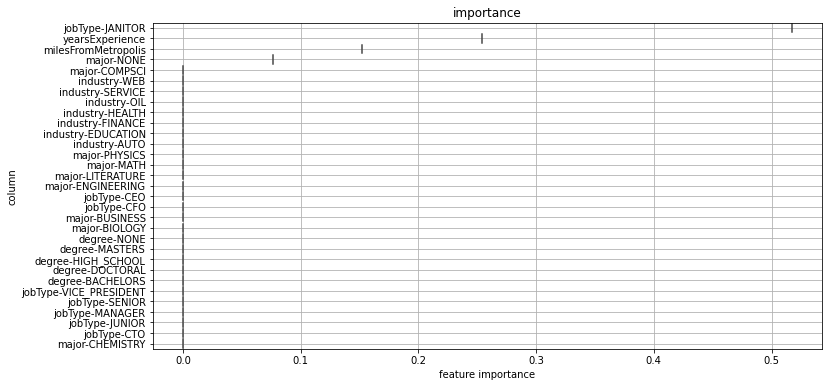

In [98]:
 #Fit a Random Forest Regressor model to the train dataset
# Import RandomForrestRegressor
from sklearn.ensemble import RandomForestRegressor
# Instantiate the model
model1=RandomForestRegressor(**{'n_estimators': 64, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 27.0, 'bootstrap': False})
# Fit the model to the data
model1.fit(train_x,train_y)
# print score of the model by calling function
coe=model1.feature_importances_
print(root_mean_squared_error(test_y,model1.predict(test_x)))
print(mean_squared_error(test_y,model1.predict(test_x)))
print(r2_scr(test_y,model1.predict(test_x)))
print('Test Score',model1.score(test_x,test_y))
print('Train Score',model1.score(train_x,train_y))
print(mean_absolute_error(test_y,model1.predict(test_x)))
# visualizing the importance of features.
features_imp(train_x,coe)
plt.show()

# DecisionTreeRegressor

Test RMSE: 0.11844921048461425
Test MSE: 0.01403021546442845
0.14711648874815486
Test Score 0.14711648874815486
Train Score 0.14235616901234172
Test MAE: 0.09466727397127103



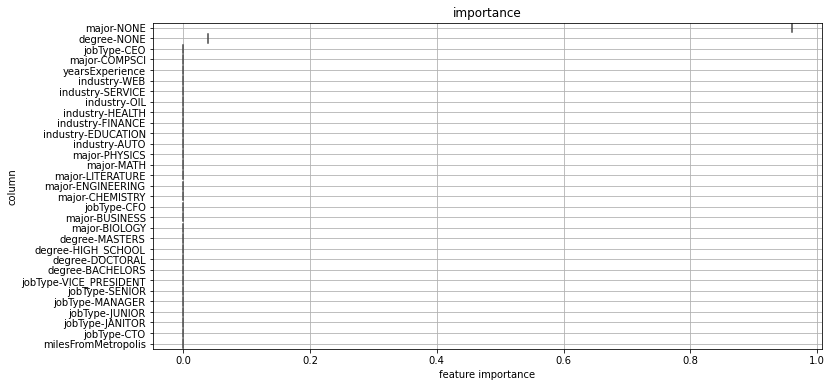

CPU times: user 252 ms, sys: 4.01 ms, total: 256 ms
Wall time: 252 ms


In [99]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
# Instantiate the model
model2=DecisionTreeRegressor(**{'splitter': 'random', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 0.2, 'max_features': None, 'max_depth': 20.0})
# Fit the model to the data
model2.fit(train_x,train_y)
coe=model2.feature_importances_
# print score of the model by calling function
print(root_mean_squared_error(test_y,model2.predict(test_x)))
print(mean_squared_error(test_y,model2.predict(test_x)))
print(r2_scr(test_y,model2.predict(test_x)))
print('Test Score',model2.score(test_x,test_y))
print('Train Score',model2.score(train_x,train_y))
print(mean_absolute_error(test_y,model2.predict(test_x)))
# visualizing the importance of features.
features_imp(train_x,coe)
plt.show()

# GradientBoostingRegressor

Test RMSE: 0.0637266433963131
Test MSE: 0.0040610850785608565
0.75313048398458
Test Score 0.75313048398458
Train Score 0.7637310250151136
Test MAE: 0.051605859495299236



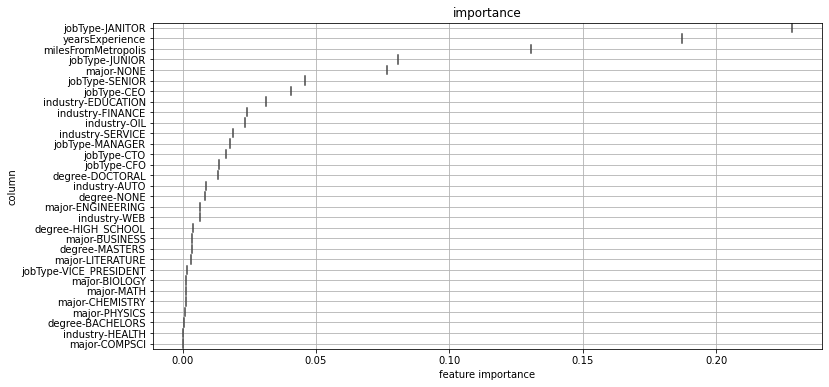

CPU times: user 3.31 s, sys: 0 ns, total: 3.31 s
Wall time: 3.31 s


In [100]:
%%time
# Fit a Gradient Boosting Regressor model to the train dataset

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
model3=GradientBoostingRegressor(**{'n_estimators': 64, 'min_samples_split': 0.1, 'max_depth': 8.0, 'learning_rate': 0.25})
# Fit the model to the data
model3.fit(train_x,train_y)
coe=model3.feature_importances_
# print score of the model by calling function
print(root_mean_squared_error(test_y,model3.predict(test_x)))
print(mean_squared_error(test_y,model3.predict(test_x)))
print(r2_scr(test_y,model3.predict(test_x)))
print('Test Score',model3.score(test_x,test_y))
print('Train Score',model3.score(train_x,train_y))
print(mean_absolute_error(test_y,model3.predict(test_x)))
# visualizing the importance of features.
features_imp(train_x,coe)
plt.show()

# XGBRegressor

In [101]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Import XGBRegressor
from xgboost import XGBRegressor
# Instantiate the model
model4=XGBRegressor(**{'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.0, 'colsmple_bytree': 0.3})
# Fit the model to the data
model4.fit(train_x,train_y)
coe=model4.feature_importances_
# print score of the model by calling function
print(root_mean_squared_error(test_y,model4.predict(test_x)))
print(mean_squared_error(test_y,model4.predict(test_x)))
print(r2_scr(test_y,model4.predict(test_x)))
#Let's print the train score and test score
print('Test Score',model4.score(test_x,test_y))
print('Train Score',model4.score(train_x,train_y))
print(mean_absolute_error(test_y,model4.predict(test_x)))
# visualizing the importance of features.
features_imp(train_x,coe)
plt.show()

Test RMSE: 0.06335554307224228
Test MSE: 0.004013924837978747
0.7559973103480903
Test Score 0.7559973103480903
Train Score 0.7732538115080596
Test MAE: 0.05134990740303432



CPU times: user 12.4 s, sys: 91.5 ms, total: 12.5 s
Wall time: 1.75 s


In [102]:
# passing features dataframe for one hot encoding process
encoder_1hot = OneHotEncoder()
encoded_features = encoder_1hot.fit_transform(features)
scaled = scaled_data[['yearsExperience','milesFromMetropolis']]
encoded_features = pd.concat([encoded_features,scaled],axis=1)
encoded_features.head()

jobType-CEO  jobType-CFO  jobType-CTO  jobType-JANITOR  jobType-JUNIOR  \
0          0.0          1.0          0.0              0.0             0.0   
1          1.0          0.0          0.0              0.0             0.0   
2          0.0          0.0          0.0              0.0             0.0   
3          0.0          0.0          0.0              0.0             0.0   
4          0.0          0.0          0.0              0.0             0.0   

   jobType-MANAGER  jobType-SENIOR  jobType-VICE_PRESIDENT  degree-BACHELORS  \
0              0.0             0.0                     0.0               0.0   
1              0.0             0.0                     0.0               0.0   
2              0.0             0.0                     1.0               0.0   
3              1.0             0.0                     0.0               0.0   
4              0.0             0.0                     1.0               1.0   

   degree-DOCTORAL  ...  major-PHYSICS  industry-AUTO  industry-EDUCATION  \
0              0.0  ...            0.0            0.0                 0.0   
1              0.0  ...            0.0            0.0                 0.0   
2              1.0  ...            1.0            0.0                 0.0   
3              1.0  ...            0.0            1.0                 0.0   
4              0.0  ...            1.0            0.0                 0.0   

   industry-FINANCE  industry-HEALTH  industry-OIL  industry-SERVICE  \
0               0.0              1.0           0.0               0.0   
1               0.0              0.0           0.0               0.0   
2               0.0              1.0           0.0               0.0   
3               0.0              0.0           0.0               0.0   
4               1.0              0.0           0.0               0.0   

   industry-WEB  yearsExperience  milesFromMetropolis  
0           0.0         0.416667             0.838384  
1           1.0         0.125000             0.737374  
2           0.0         0.416667             0.383838  
3           0.0         0.333333             0.171717  
4           0.0         0.333333             0.161616  

[5 rows x 31 columns]

In [103]:
# Perforn the prediction on the test dataset
prediction=model4.predict(encoded_features)
prediction

array([0.4216903 , 0.38220435, 0.46177822, ..., 0.22420463, 0.44291168,
       0.38078853], dtype=float32)

#  Conclusion
According to this model, the predicted value we got,
matches with the actual target values. Does the model is performing well.
Even though we use only 50000 samples, the model may perform much better when trained on complete dataset.
We have performed EDA, preprocessing, buid different models, visualized feature importance, did hyper parameter tunning of each model and did prediction.